In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

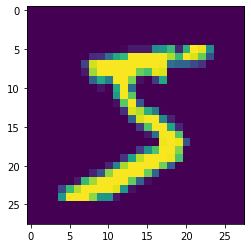

In [4]:
plt.imshow(x_train[0])
plt.show()

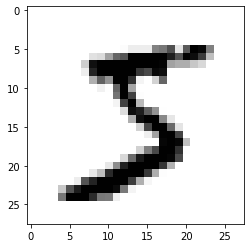

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# normalisasi -> mengubah intensitas pixel 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# me-reshape // mengubah image size agar bisa digunakan dalam operasi Convolution
# untuk bisa kernel operation diperlukan 1 dimensi lagi

IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # menambah 1 dimensi untuk kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples Dimention: ", x_trainr.shape)
print("Testing Samples Dimention: ", x_testr.shape)

Training Samples Dimention:  (60000, 28, 28, 1)
Testing Samples Dimention:  (10000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
model = Sequential()

#First layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

#Second layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

#Third layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

#Fully connected layer # 1
model.add(Flatten()) #di-flatten dari 2D ke 1D
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected layer # 2
model.add(Dense(32))
model.add(Activation("relu"))

#Fully connected layer # 3
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [13]:
print("Total training samples = ", len(x_trainr))

Total training samples =  60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [15]:
# Train data 
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 15s 7ms/step - loss: 0.3327 - accuracy: 0.8923 - val_loss: 0.1145 - val_accuracy: 0.9636
Epoch 2/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1023 - accuracy: 0.9691 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0723 - accuracy: 0.9780 - val_loss: 0.0977 - val_accuracy: 0.9717
Epoch 4/5
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0660 - val_accuracy: 0.9805
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0574 - val_accuracy: 0.9818


In [16]:
# check data accuracy

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0502 - accuracy: 0.9844: 
Test loss on 10,000 test samples 0.050205547362565994
Validation Accuracy on 10,000 test samples 0.9843999743461609


In [17]:
predictions = model.predict ([x_testr])
print(predictions)

[[6.3657360e-08 4.2394208e-07 3.2451385e-06 ... 9.9999130e-01
  1.8075451e-07 2.8049833e-06]
 [1.3756492e-04 5.5130622e-05 9.9960810e-01 ... 4.6469024e-05
  2.9970797e-05 1.7316685e-06]
 [4.3838331e-06 9.9977714e-01 3.5616831e-06 ... 8.8067136e-06
  1.7961891e-05 5.3479562e-07]
 ...
 [2.2271847e-09 4.2662575e-07 1.3059609e-07 ... 2.0729051e-06
  6.8992927e-06 1.3507168e-05]
 [8.9135492e-06 1.5374111e-09 3.4595203e-08 ... 3.4187098e-10
  4.0654464e-05 2.3693342e-06]
 [2.2857812e-05 4.8823581e-09 6.3277662e-06 ... 1.4034075e-09
  5.5195991e-04 2.2086779e-06]]


In [18]:
print(np.argmax(predictions[0]))

7


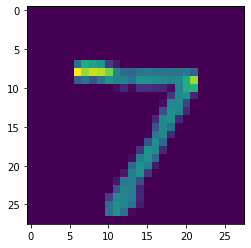

In [19]:
plt.imshow(x_test[0])

In [20]:
print(np.argmax(predictions[128]))

8


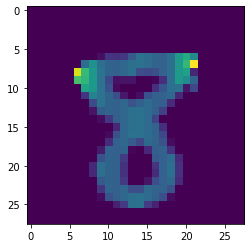

In [21]:
plt.imshow(x_test[128])

In [22]:
print(np.argmax(predictions[90]))

3


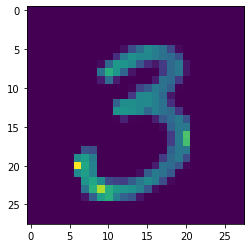

In [23]:
plt.imshow(x_test[90])

In [24]:
import cv2

0


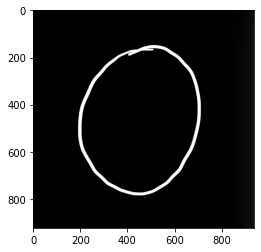

In [25]:
img0 = cv2.imread("dataset/0/img (1).jpg")
plt.imshow(img0)

gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


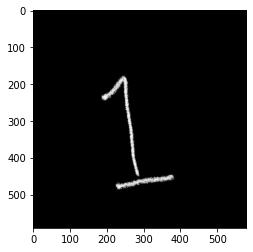

In [26]:
img1 = cv2.imread("dataset/1/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


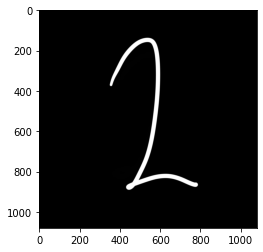

In [27]:
img1 = cv2.imread("dataset/2/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


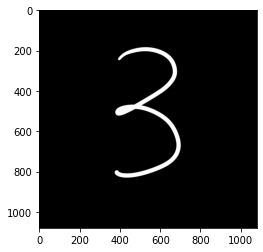

In [28]:
img1 = cv2.imread("dataset/3/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


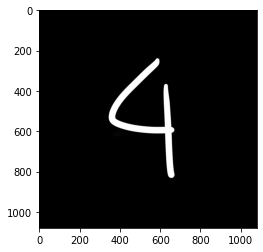

In [29]:
img1 = cv2.imread("dataset/4/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


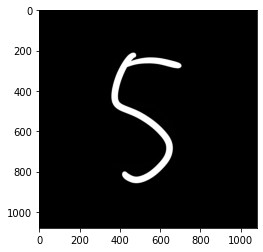

In [30]:
img1 = cv2.imread("dataset/5/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


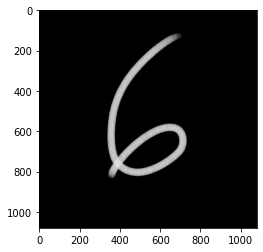

In [31]:
img1 = cv2.imread("dataset/6/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


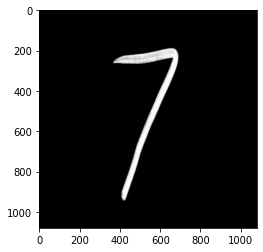

In [32]:
img1 = cv2.imread("dataset/7/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


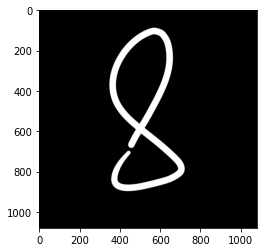

In [33]:
img1 = cv2.imread("dataset/8/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

In [ ]:
img1 = cv2.imread("dataset/9/img (1).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


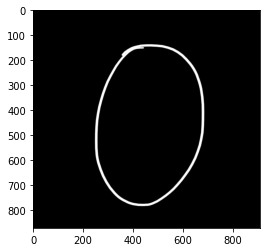

In [36]:
img1 = cv2.imread("dataset/0/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


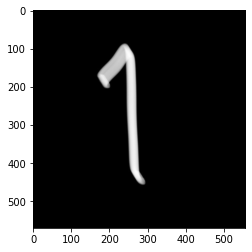

In [37]:
img1 = cv2.imread("dataset/1/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


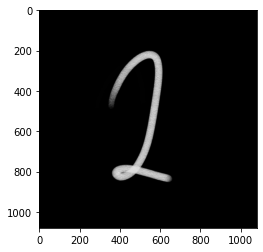

In [38]:
img1 = cv2.imread("dataset/2/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


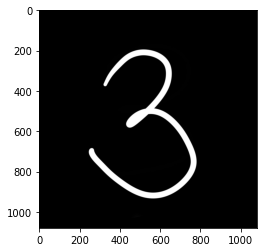

In [39]:
img1 = cv2.imread("dataset/3/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


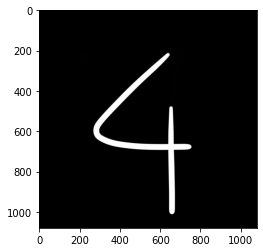

In [40]:
img1 = cv2.imread("dataset/4/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


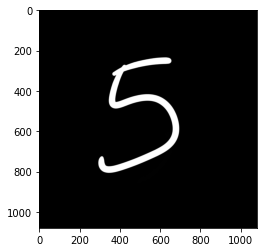

In [41]:
img1 = cv2.imread("dataset/5/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


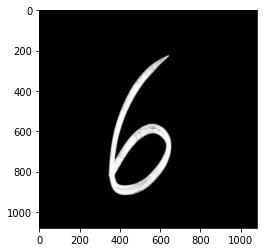

In [42]:
img1 = cv2.imread("dataset/6/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


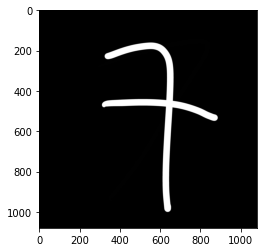

In [43]:
img1 = cv2.imread("dataset/7/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


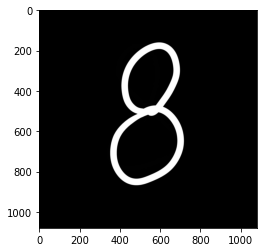

In [44]:
img1 = cv2.imread("dataset/8/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


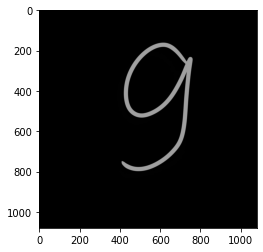

In [45]:
img1 = cv2.imread("dataset/9/img (2).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


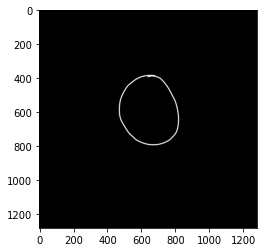

In [46]:
img1 = cv2.imread("dataset/0/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


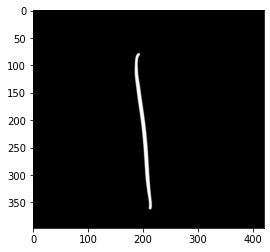

In [47]:
img1 = cv2.imread("dataset/1/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


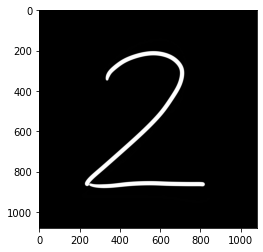

In [48]:
img1 = cv2.imread("dataset/2/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


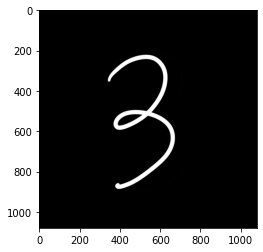

In [49]:
img1 = cv2.imread("dataset/3/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


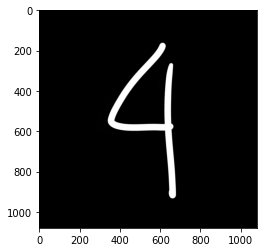

In [50]:
img1 = cv2.imread("dataset/4/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


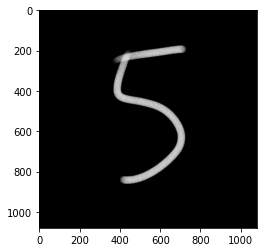

In [51]:
img1 = cv2.imread("dataset/5/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


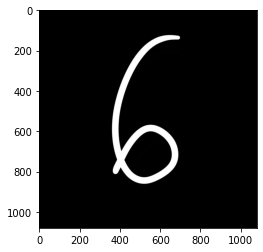

In [52]:
img1 = cv2.imread("dataset/6/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


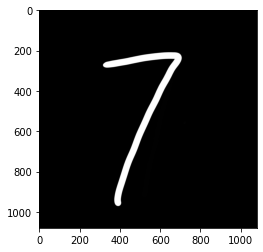

In [53]:
img1 = cv2.imread("dataset/7/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


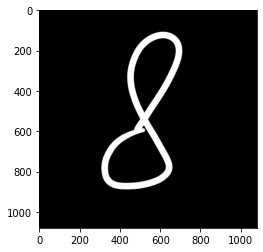

In [54]:
img1 = cv2.imread("dataset/8/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


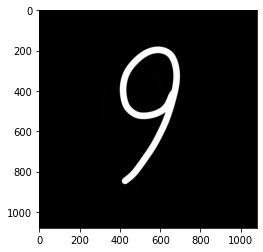

In [55]:
img1 = cv2.imread("dataset/9/img (3).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


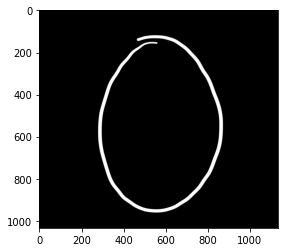

In [56]:
img1 = cv2.imread("dataset/0/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


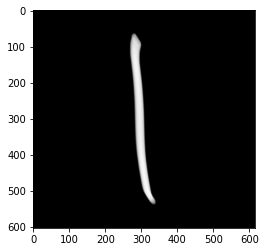

In [57]:
img1 = cv2.imread("dataset/1/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


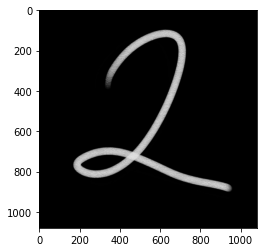

In [58]:
img1 = cv2.imread("dataset/2/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


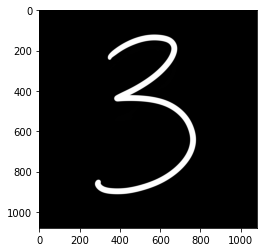

In [59]:
img1 = cv2.imread("dataset/3/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


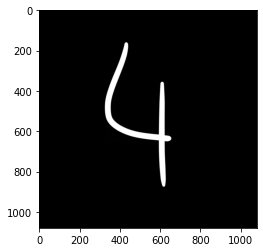

In [60]:
img1 = cv2.imread("dataset/4/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


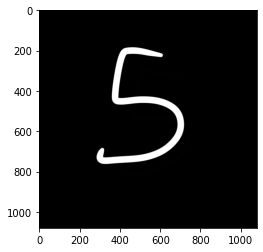

In [61]:
img1 = cv2.imread("dataset/5/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


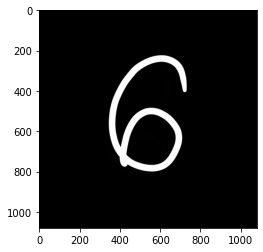

In [62]:
img1 = cv2.imread("dataset/6/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


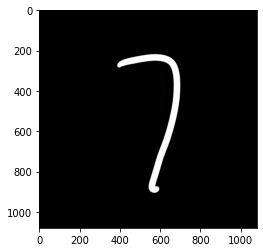

In [63]:
img1 = cv2.imread("dataset/7/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


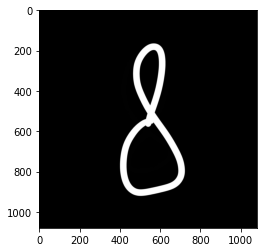

In [64]:
img1 = cv2.imread("dataset/8/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


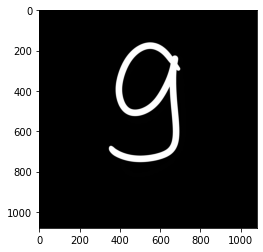

In [65]:
img1 = cv2.imread("dataset/9/img (4).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


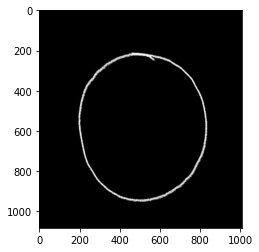

In [66]:
img1 = cv2.imread("dataset/0/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


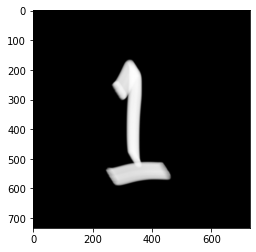

In [67]:
img1 = cv2.imread("dataset/1/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


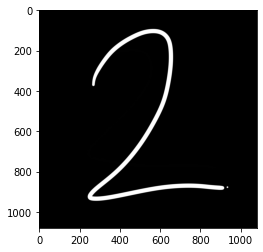

In [68]:
img1 = cv2.imread("dataset/2/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


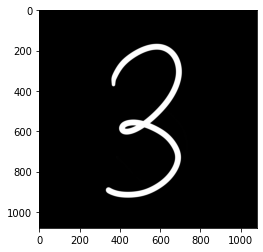

In [69]:
img1 = cv2.imread("dataset/3/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


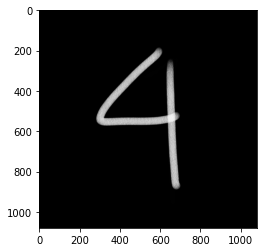

In [70]:
img1 = cv2.imread("dataset/4/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


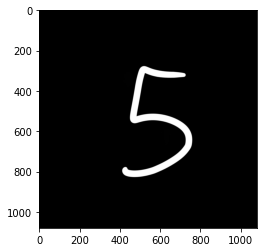

In [71]:
img1 = cv2.imread("dataset/5/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


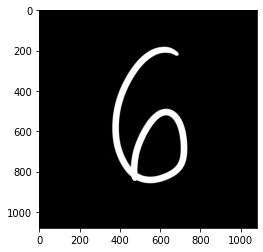

In [72]:
img1 = cv2.imread("dataset/6/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


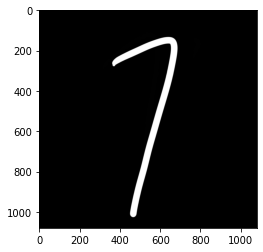

In [73]:
img1 = cv2.imread("dataset/7/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


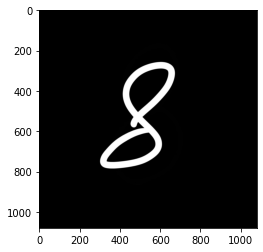

In [74]:
img1 = cv2.imread("dataset/8/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


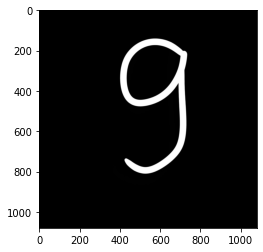

In [75]:
img1 = cv2.imread("dataset/9/img (5).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


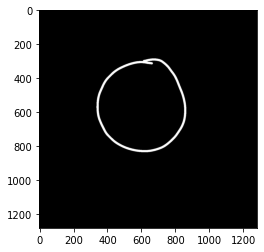

In [76]:
img1 = cv2.imread("dataset/0/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


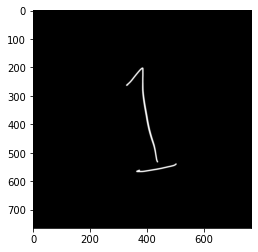

In [77]:
img1 = cv2.imread("dataset/1/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


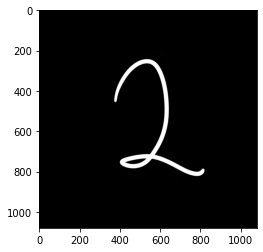

In [78]:
img1 = cv2.imread("dataset/2/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


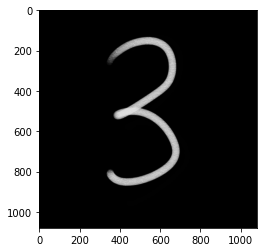

In [79]:
img1 = cv2.imread("dataset/3/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


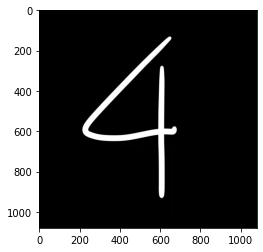

In [80]:
img1 = cv2.imread("dataset/4/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


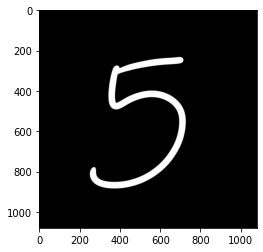

In [81]:
img1 = cv2.imread("dataset/5/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


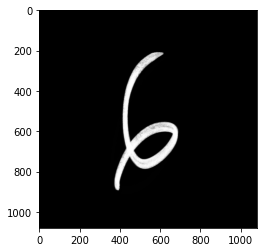

In [82]:
img1 = cv2.imread("dataset/6/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


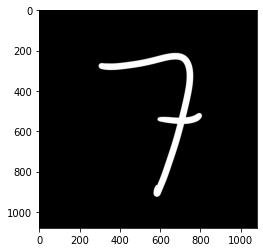

In [83]:
img1 = cv2.imread("dataset/7/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


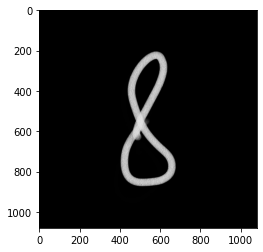

In [84]:
img1 = cv2.imread("dataset/8/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


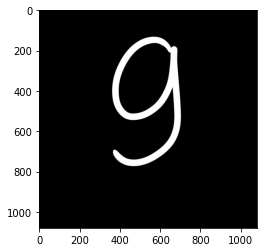

In [85]:
img1 = cv2.imread("dataset/9/img (6).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


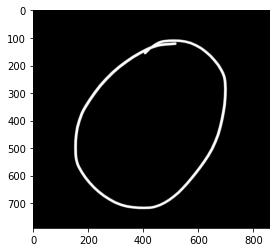

In [86]:
img1 = cv2.imread("dataset/0/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


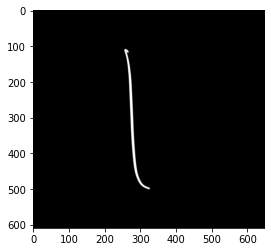

In [87]:
img1 = cv2.imread("dataset/1/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


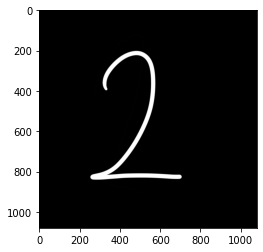

In [88]:
img1 = cv2.imread("dataset/2/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


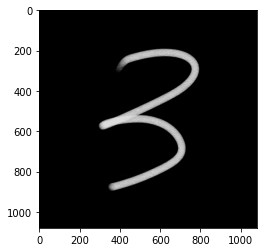

In [89]:
img1 = cv2.imread("dataset/3/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


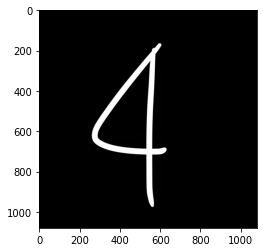

In [90]:
img1 = cv2.imread("dataset/4/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


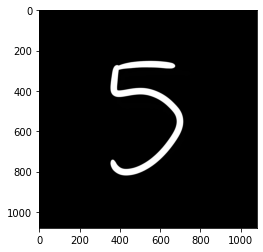

In [91]:
img1 = cv2.imread("dataset/5/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


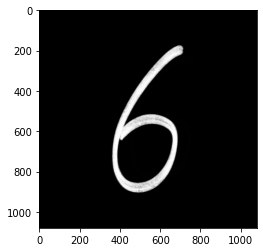

In [92]:
img1 = cv2.imread("dataset/6/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


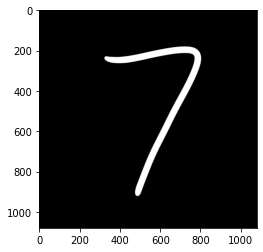

In [93]:
img1 = cv2.imread("dataset/7/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


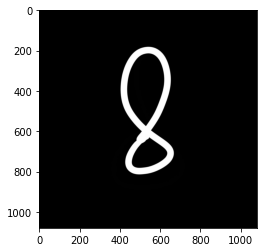

In [94]:
img1 = cv2.imread("dataset/8/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


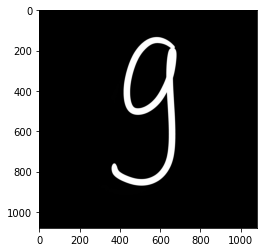

In [95]:
img1 = cv2.imread("dataset/9/img (7).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


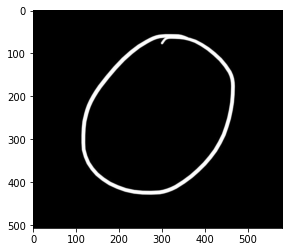

In [96]:
img1 = cv2.imread("dataset/0/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


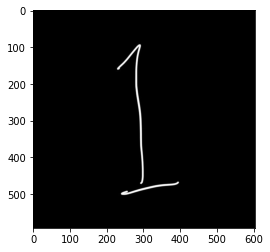

In [97]:
img1 = cv2.imread("dataset/1/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


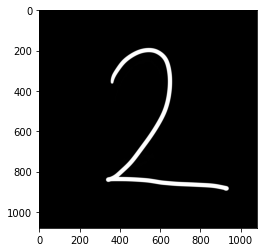

In [98]:
img1 = cv2.imread("dataset/2/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


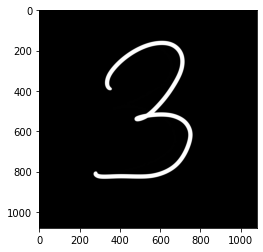

In [99]:
img1 = cv2.imread("dataset/3/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


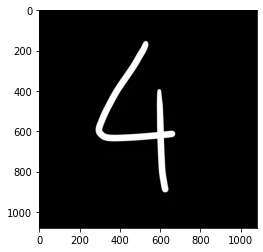

In [100]:
img1 = cv2.imread("dataset/4/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


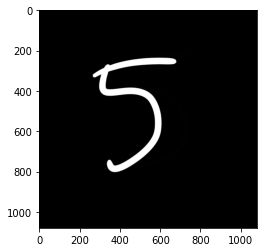

In [101]:
img1 = cv2.imread("dataset/5/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


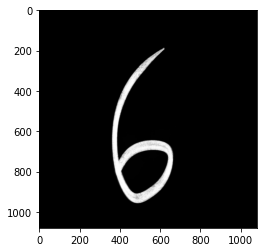

In [102]:
img1 = cv2.imread("dataset/6/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


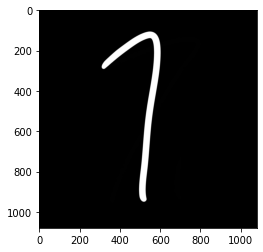

In [103]:
img1 = cv2.imread("dataset/7/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


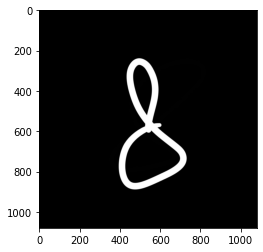

In [104]:
img1 = cv2.imread("dataset/8/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


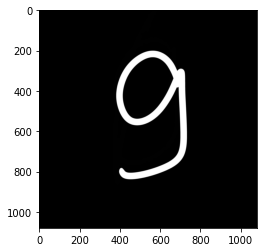

In [105]:
img1 = cv2.imread("dataset/9/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


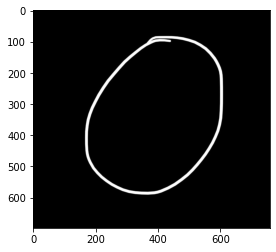

In [106]:
img1 = cv2.imread("dataset/0/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


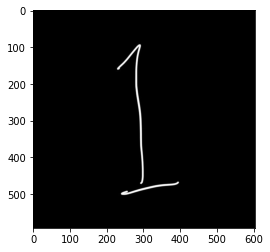

In [107]:
img1 = cv2.imread("dataset/1/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


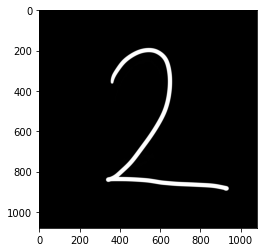

In [108]:
img1 = cv2.imread("dataset/2/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


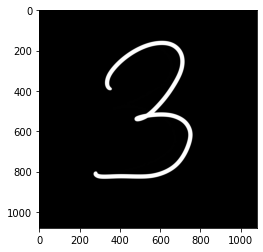

In [109]:
img1 = cv2.imread("dataset/3/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


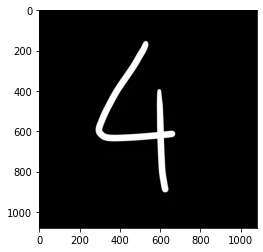

In [110]:
img1 = cv2.imread("dataset/4/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


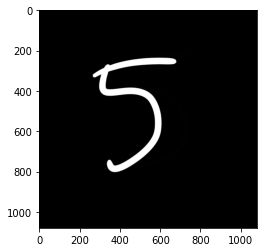

In [111]:
img1 = cv2.imread("dataset/5/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


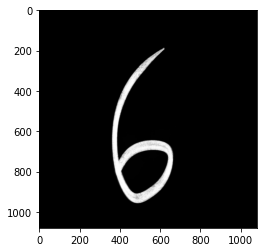

In [112]:
img1 = cv2.imread("dataset/6/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


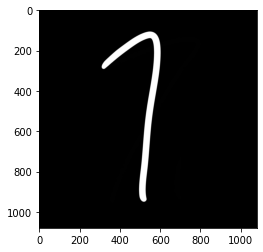

In [113]:
img1 = cv2.imread("dataset/7/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


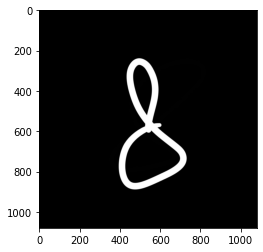

In [114]:
img1 = cv2.imread("dataset/8/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


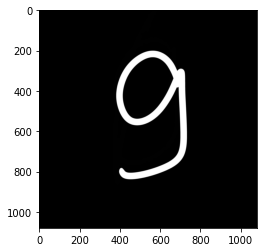

In [115]:
img1 = cv2.imread("dataset/9/img (8).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


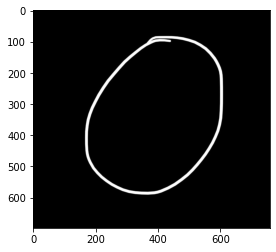

In [116]:
img1 = cv2.imread("dataset/0/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


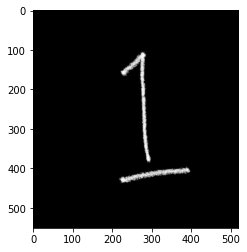

In [117]:
img1 = cv2.imread("dataset/1/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


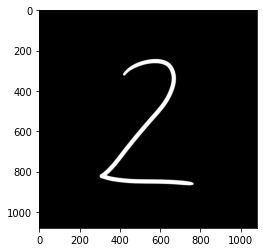

In [118]:
img1 = cv2.imread("dataset/2/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


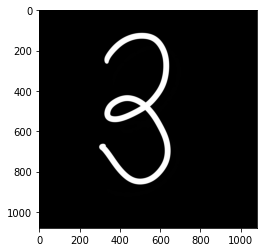

In [119]:
img1 = cv2.imread("dataset/3/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


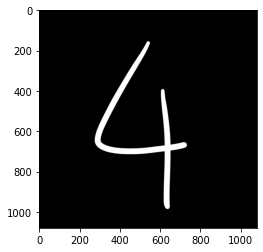

In [120]:
img1 = cv2.imread("dataset/4/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


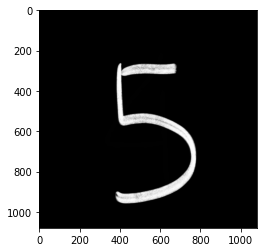

In [121]:
img1 = cv2.imread("dataset/5/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


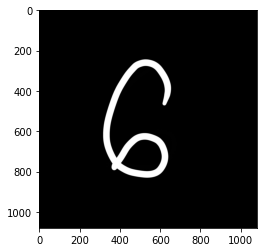

In [122]:
img1 = cv2.imread("dataset/6/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


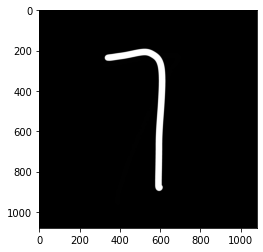

In [123]:
img1 = cv2.imread("dataset/7/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


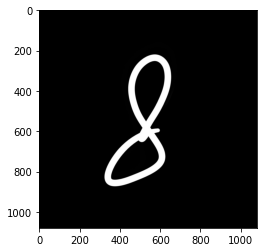

In [124]:
img1 = cv2.imread("dataset/8/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


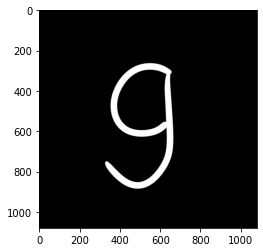

In [125]:
img1 = cv2.imread("dataset/9/img (9).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


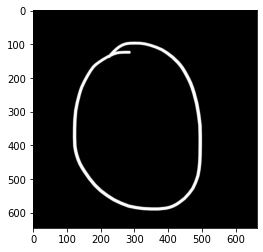

In [126]:
img1 = cv2.imread("dataset/0/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


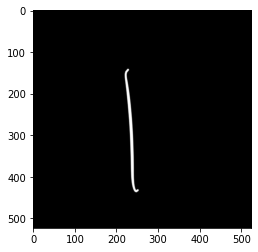

In [128]:
img1 = cv2.imread("dataset/1/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


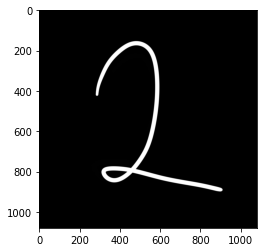

In [129]:
img1 = cv2.imread("dataset/2/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


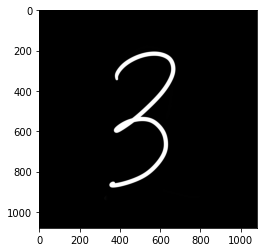

In [130]:
img1 = cv2.imread("dataset/3/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


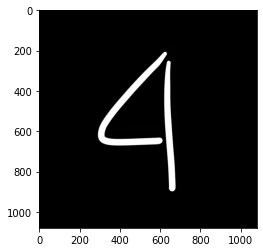

In [131]:
img1 = cv2.imread("dataset/4/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


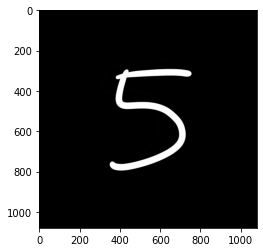

In [132]:
img1 = cv2.imread("dataset/5/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


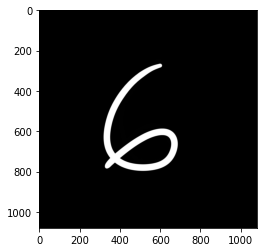

In [133]:
img1 = cv2.imread("dataset/6/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


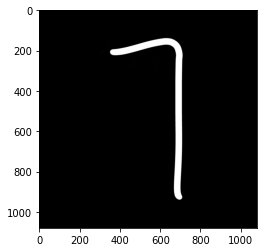

In [134]:
img1 = cv2.imread("dataset/7/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


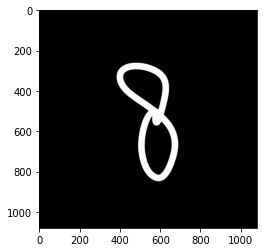

In [135]:
img1 = cv2.imread("dataset/8/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


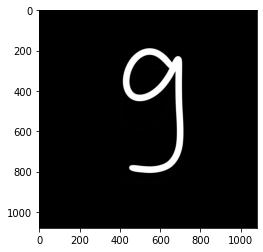

In [136]:
img1 = cv2.imread("dataset/9/img (10).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


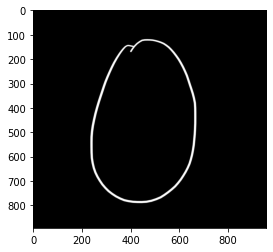

In [137]:
img1 = cv2.imread("dataset/0/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


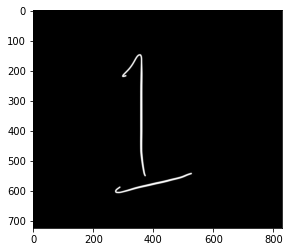

In [138]:
img1 = cv2.imread("dataset/1/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


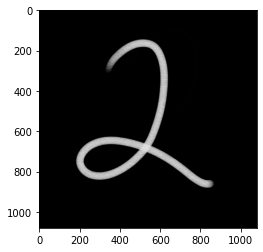

In [139]:
img1 = cv2.imread("dataset/2/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


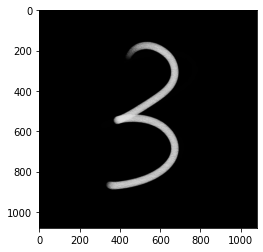

In [140]:
img1 = cv2.imread("dataset/3/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


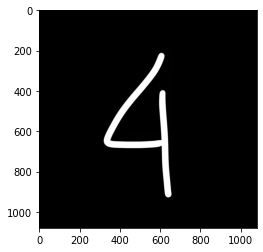

In [141]:
img1 = cv2.imread("dataset/4/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


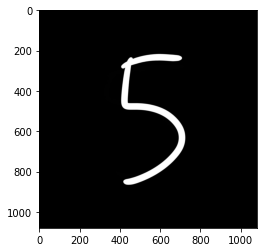

In [142]:
img1 = cv2.imread("dataset/5/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


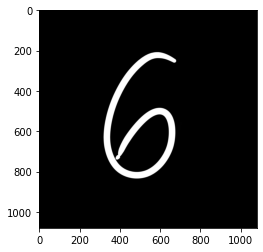

In [143]:
img1 = cv2.imread("dataset/6/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


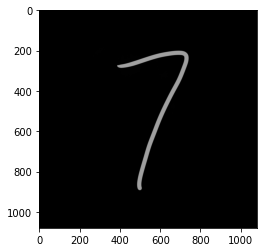

In [144]:
img1 = cv2.imread("dataset/7/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


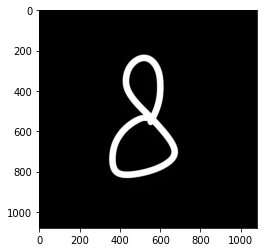

In [145]:
img1 = cv2.imread("dataset/8/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


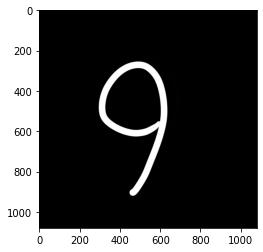

In [146]:
img1 = cv2.imread("dataset/9/img (11).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


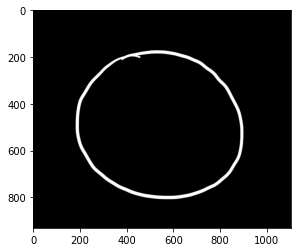

In [147]:
img1 = cv2.imread("dataset/0/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


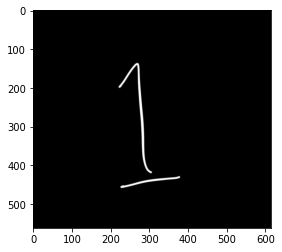

In [148]:
img1 = cv2.imread("dataset/1/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


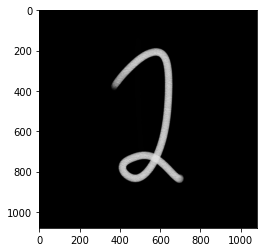

In [149]:
img1 = cv2.imread("dataset/2/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


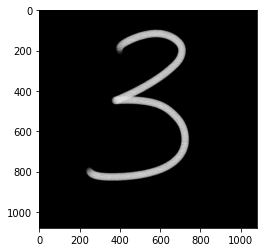

In [150]:
img1 = cv2.imread("dataset/3/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


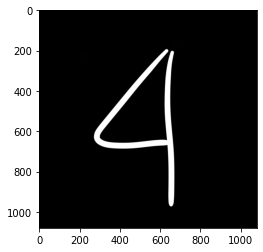

In [151]:
img1 = cv2.imread("dataset/4/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


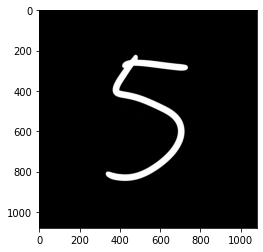

In [152]:
img1 = cv2.imread("dataset/5/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


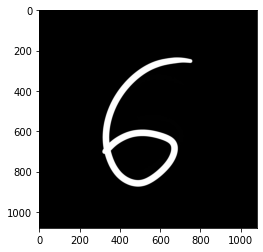

In [153]:
img1 = cv2.imread("dataset/6/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


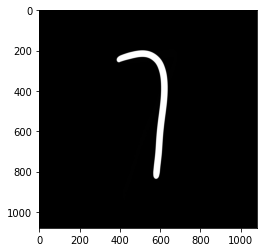

In [154]:
img1 = cv2.imread("dataset/7/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


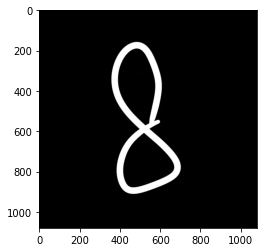

In [155]:
img1 = cv2.imread("dataset/8/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


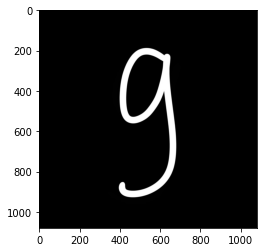

In [156]:
img1 = cv2.imread("dataset/9/img (12).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


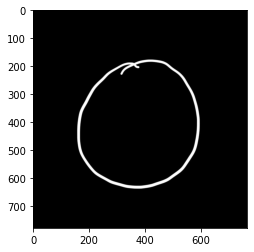

In [157]:
img1 = cv2.imread("dataset/0/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


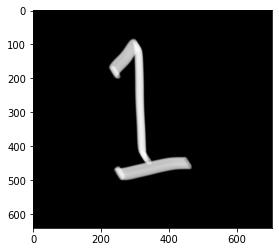

In [158]:
img1 = cv2.imread("dataset/1/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


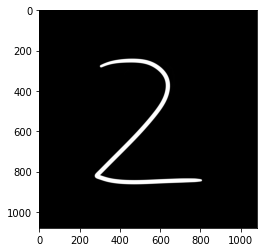

In [159]:
img1 = cv2.imread("dataset/2/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


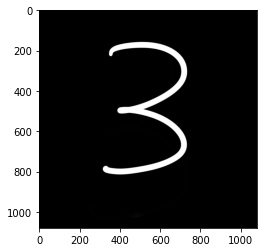

In [160]:
img1 = cv2.imread("dataset/3/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


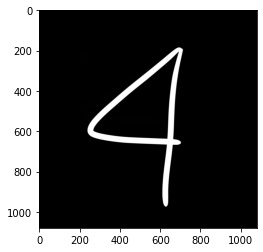

In [161]:
img1 = cv2.imread("dataset/4/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


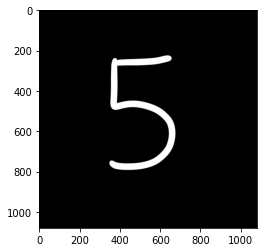

In [162]:
img1 = cv2.imread("dataset/5/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


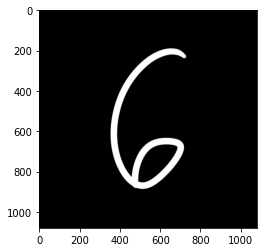

In [163]:
img1 = cv2.imread("dataset/6/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


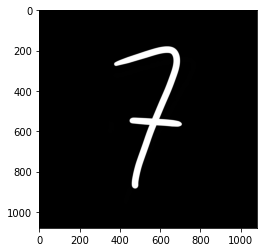

In [164]:
img1 = cv2.imread("dataset/7/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


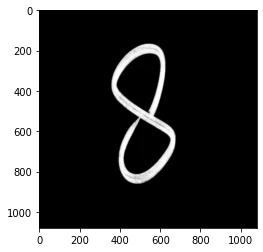

In [165]:
img1 = cv2.imread("dataset/8/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


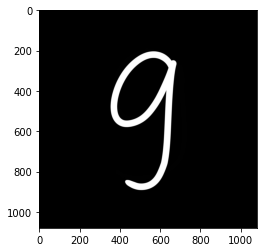

In [166]:
img1 = cv2.imread("dataset/9/img (13).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


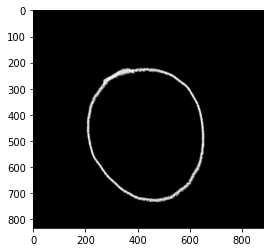

In [167]:
img1 = cv2.imread("dataset/0/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


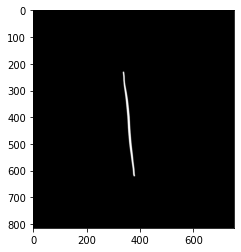

In [168]:
img1 = cv2.imread("dataset/1/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


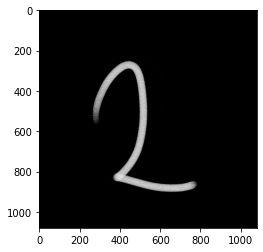

In [169]:
img1 = cv2.imread("dataset/2/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


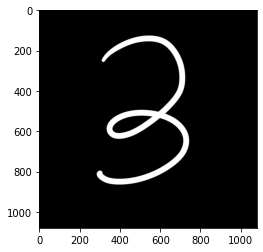

In [170]:
img1 = cv2.imread("dataset/3/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


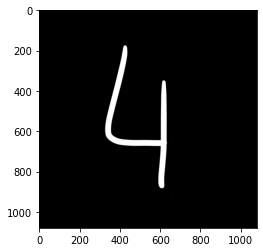

In [171]:
img1 = cv2.imread("dataset/4/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


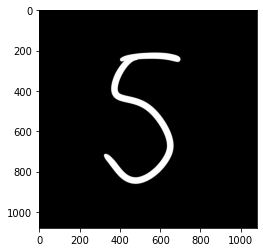

In [172]:
img1 = cv2.imread("dataset/5/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


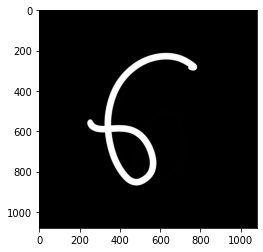

In [173]:
img1 = cv2.imread("dataset/6/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


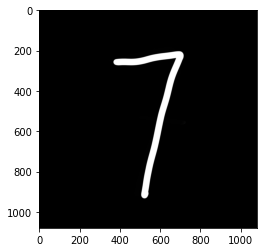

In [174]:
img1 = cv2.imread("dataset/7/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


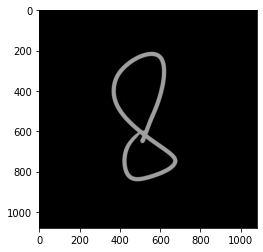

In [175]:
img1 = cv2.imread("dataset/8/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


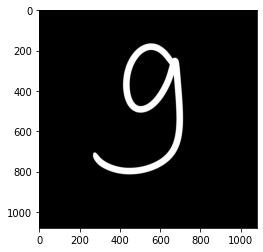

In [176]:
img1 = cv2.imread("dataset/9/img (14).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


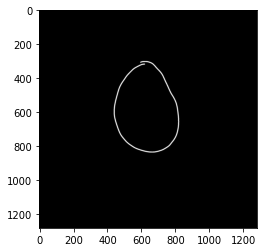

In [177]:
img1 = cv2.imread("dataset/0/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


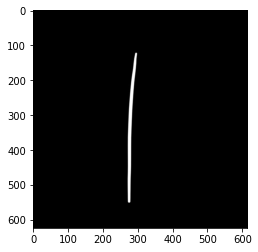

In [178]:
img1 = cv2.imread("dataset/1/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


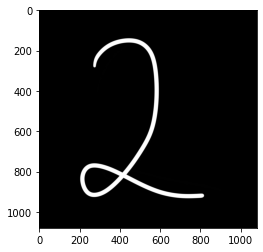

In [179]:
img1 = cv2.imread("dataset/2/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


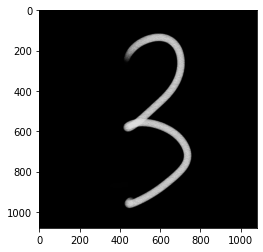

In [180]:
img1 = cv2.imread("dataset/3/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


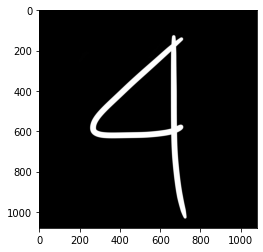

In [181]:
img1 = cv2.imread("dataset/4/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


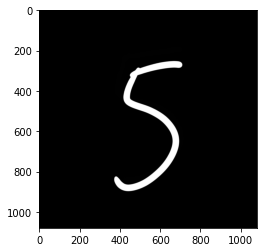

In [182]:
img1 = cv2.imread("dataset/5/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


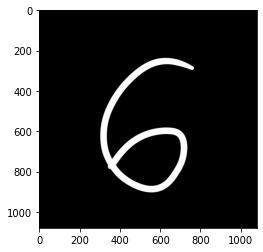

In [183]:
img1 = cv2.imread("dataset/6/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


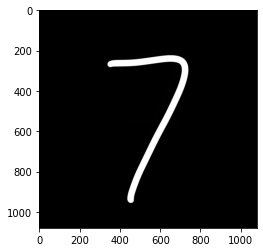

In [184]:
img1 = cv2.imread("dataset/7/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


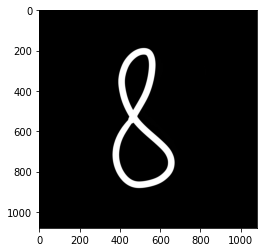

In [185]:
img1 = cv2.imread("dataset/8/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


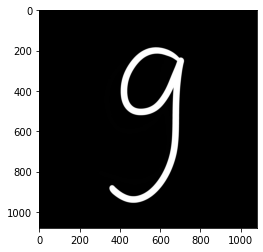

In [186]:
img1 = cv2.imread("dataset/9/img (15).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


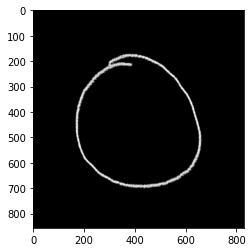

In [187]:
img1 = cv2.imread("dataset/0/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


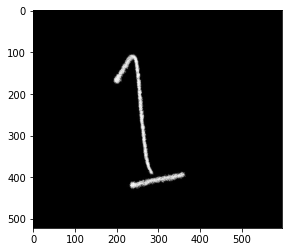

In [188]:
img1 = cv2.imread("dataset/1/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


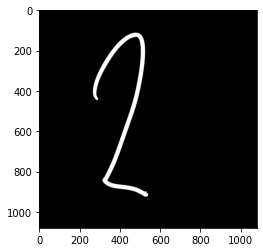

In [189]:
img1 = cv2.imread("dataset/2/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


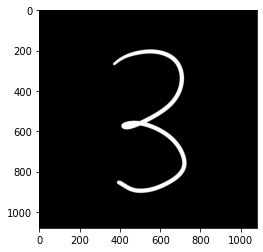

In [190]:
img1 = cv2.imread("dataset/3/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


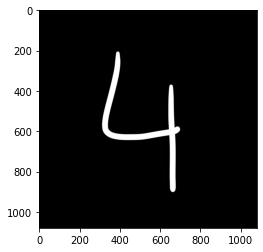

In [191]:
img1 = cv2.imread("dataset/4/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


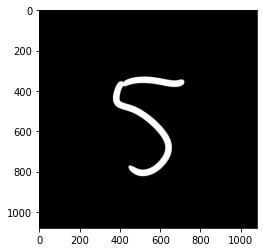

In [192]:
img1 = cv2.imread("dataset/5/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


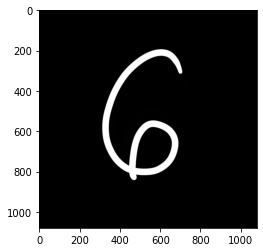

In [193]:
img1 = cv2.imread("dataset/6/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


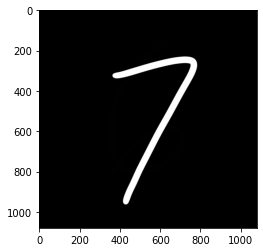

In [194]:
img1 = cv2.imread("dataset/7/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


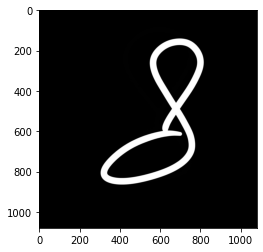

In [195]:
img1 = cv2.imread("dataset/8/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


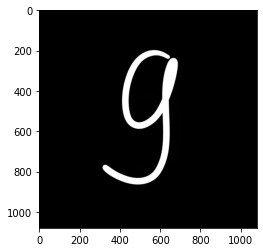

In [196]:
img1 = cv2.imread("dataset/9/img (16).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


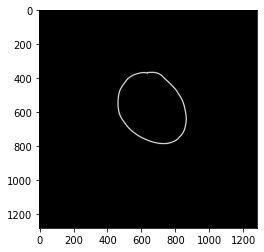

In [197]:
img1 = cv2.imread("dataset/0/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


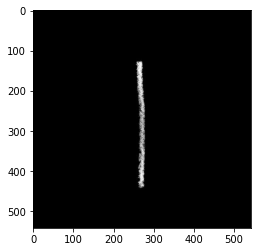

In [198]:
img1 = cv2.imread("dataset/1/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


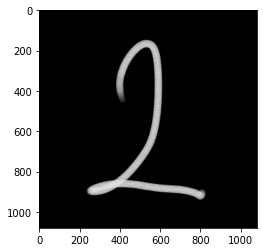

In [199]:
img1 = cv2.imread("dataset/2/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


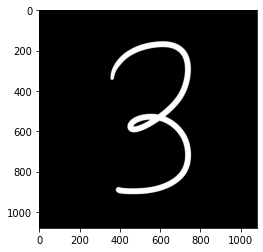

In [200]:
img1 = cv2.imread("dataset/3/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


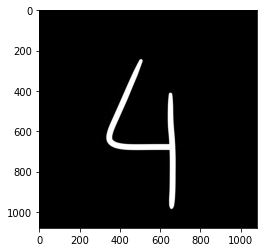

In [201]:
img1 = cv2.imread("dataset/4/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


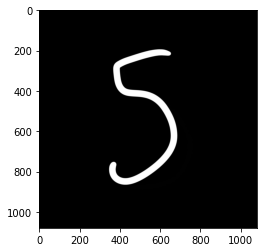

In [202]:
img1 = cv2.imread("dataset/5/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


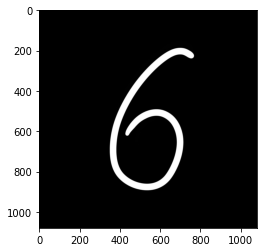

In [203]:
img1 = cv2.imread("dataset/6/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


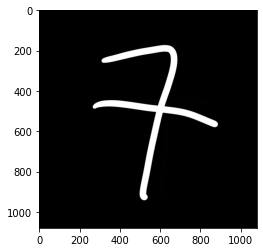

In [204]:
img1 = cv2.imread("dataset/7/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


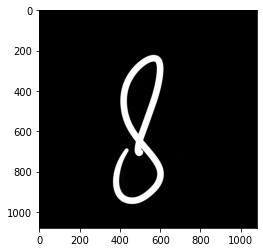

In [205]:
img1 = cv2.imread("dataset/8/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


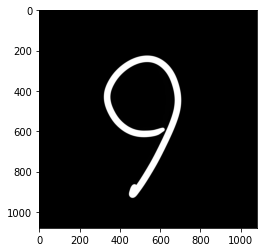

In [206]:
img1 = cv2.imread("dataset/9/img (17).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


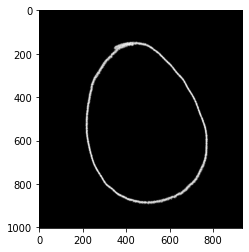

In [207]:
img1 = cv2.imread("dataset/0/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


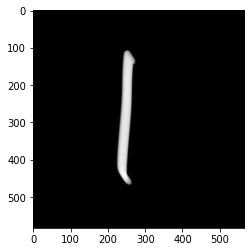

In [208]:
img1 = cv2.imread("dataset/1/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


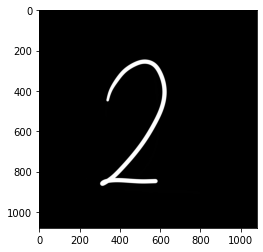

In [209]:
img1 = cv2.imread("dataset/2/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


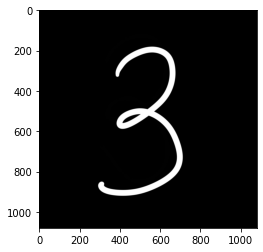

In [210]:
img1 = cv2.imread("dataset/3/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


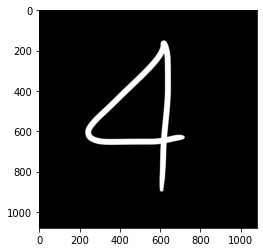

In [211]:
img1 = cv2.imread("dataset/4/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


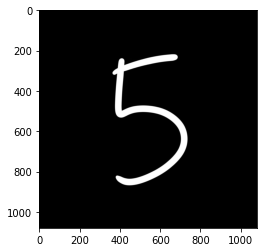

In [212]:
img1 = cv2.imread("dataset/5/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


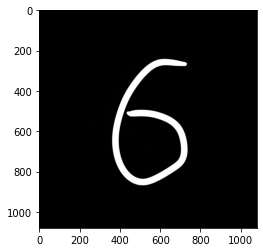

In [213]:
img1 = cv2.imread("dataset/6/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


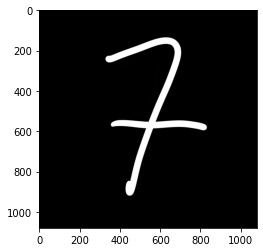

In [214]:
img1 = cv2.imread("dataset/7/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


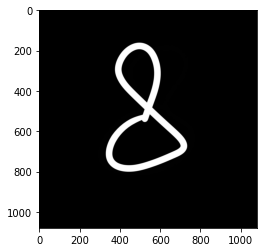

In [215]:
img1 = cv2.imread("dataset/8/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


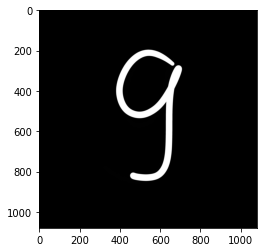

In [216]:
img1 = cv2.imread("dataset/9/img (18).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


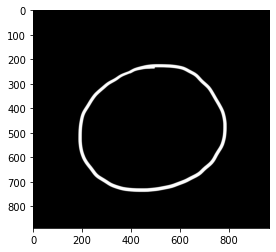

In [217]:
img1 = cv2.imread("dataset/0/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


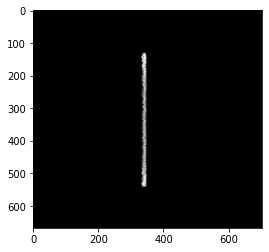

In [218]:
img1 = cv2.imread("dataset/1/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


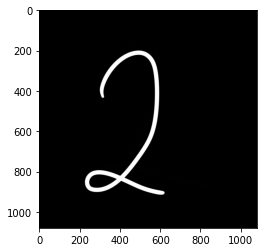

In [219]:
img1 = cv2.imread("dataset/2/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


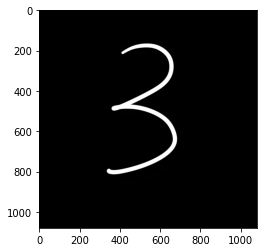

In [220]:
img1 = cv2.imread("dataset/3/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


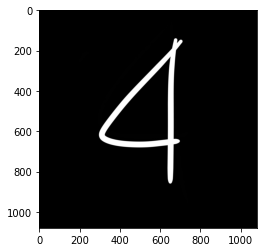

In [221]:
img1 = cv2.imread("dataset/4/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


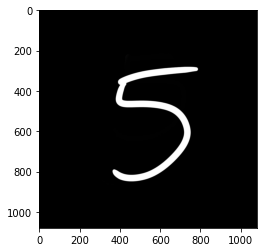

In [222]:
img1 = cv2.imread("dataset/5/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


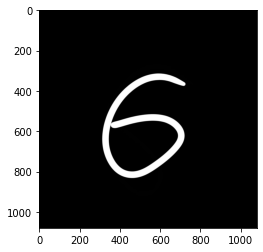

In [223]:
img1 = cv2.imread("dataset/6/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


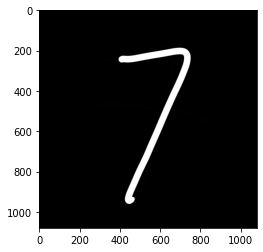

In [224]:
img1 = cv2.imread("dataset/7/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


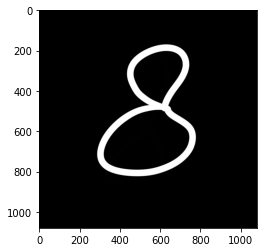

In [225]:
img1 = cv2.imread("dataset/8/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


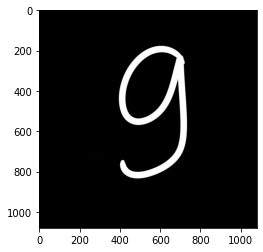

In [226]:
img1 = cv2.imread("dataset/9/img (19).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


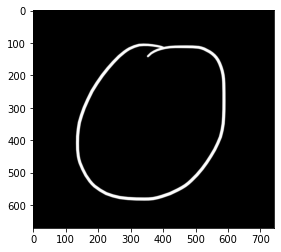

In [227]:
img1 = cv2.imread("dataset/0/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


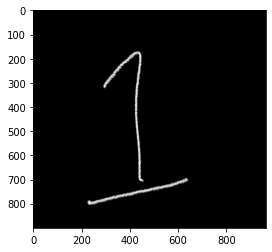

In [228]:
img1 = cv2.imread("dataset/1/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


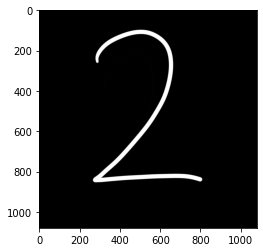

In [229]:
img1 = cv2.imread("dataset/2/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


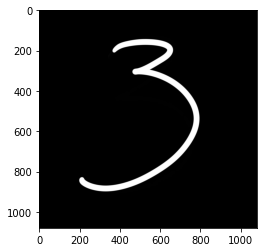

In [230]:
img1 = cv2.imread("dataset/3/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


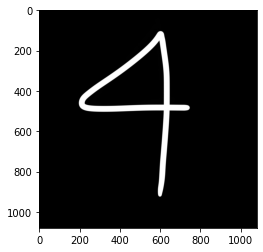

In [231]:
img1 = cv2.imread("dataset/4/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


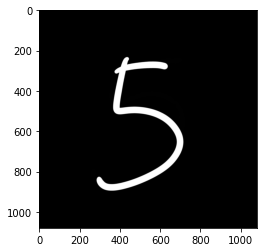

In [232]:
img1 = cv2.imread("dataset/5/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


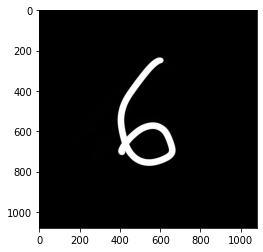

In [233]:
img1 = cv2.imread("dataset/6/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


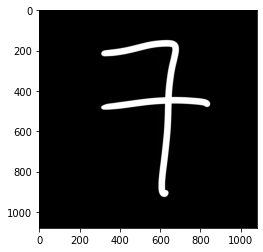

In [234]:
img1 = cv2.imread("dataset/7/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


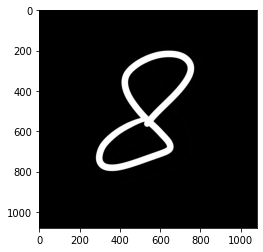

In [235]:
img1 = cv2.imread("dataset/8/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


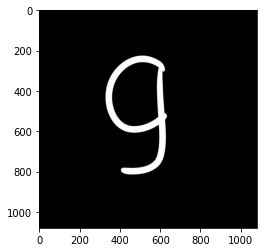

In [236]:
img1 = cv2.imread("dataset/9/img (20).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


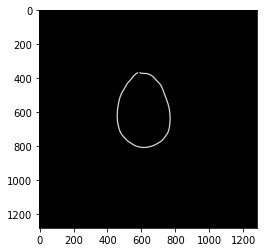

In [237]:
img1 = cv2.imread("dataset/0/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


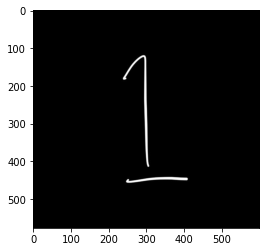

In [238]:
img1 = cv2.imread("dataset/1/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


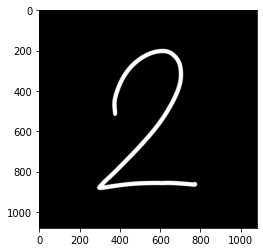

In [239]:
img1 = cv2.imread("dataset/2/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


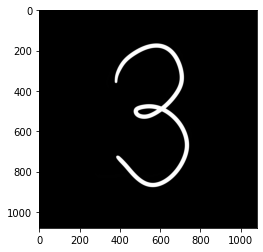

In [240]:
img1 = cv2.imread("dataset/3/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


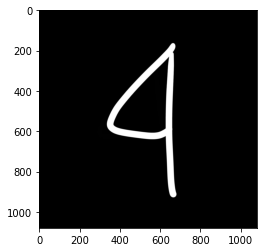

In [241]:
img1 = cv2.imread("dataset/4/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


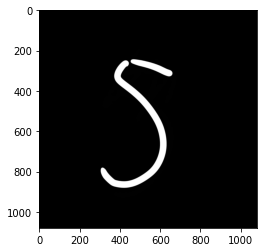

In [242]:
img1 = cv2.imread("dataset/5/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


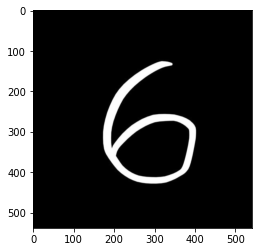

In [243]:
img1 = cv2.imread("dataset/6/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


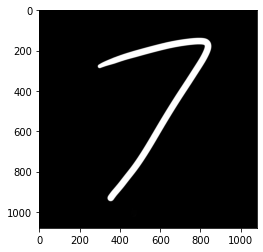

In [244]:
img1 = cv2.imread("dataset/7/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


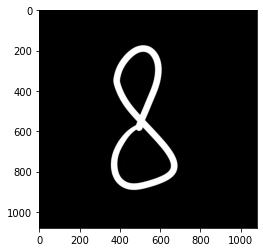

In [245]:
img1 = cv2.imread("dataset/8/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


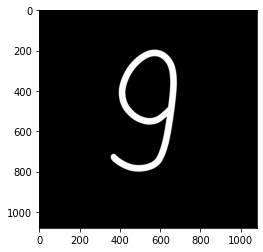

In [246]:
img1 = cv2.imread("dataset/9/img (21).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


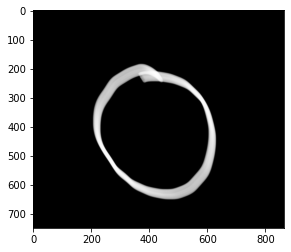

In [247]:
img1 = cv2.imread("dataset/0/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


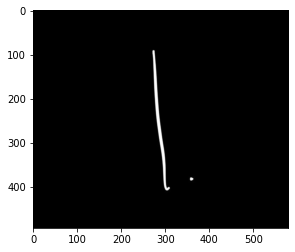

In [248]:
img1 = cv2.imread("dataset/1/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


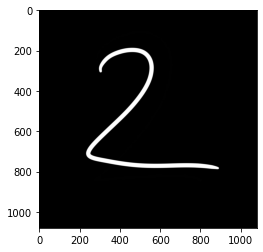

In [249]:
img1 = cv2.imread("dataset/2/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


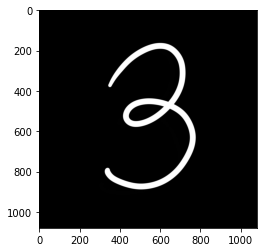

In [250]:
img1 = cv2.imread("dataset/3/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


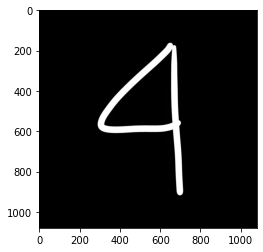

In [251]:
img1 = cv2.imread("dataset/4/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


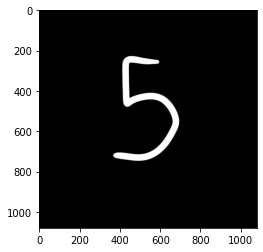

In [252]:
img1 = cv2.imread("dataset/5/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


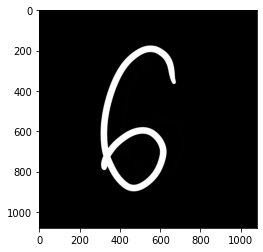

In [253]:
img1 = cv2.imread("dataset/6/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


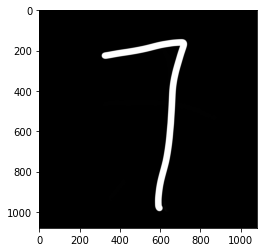

In [254]:
img1 = cv2.imread("dataset/7/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


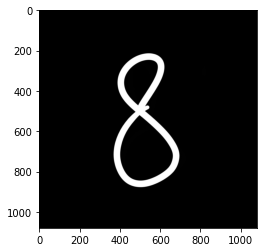

In [255]:
img1 = cv2.imread("dataset/8/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


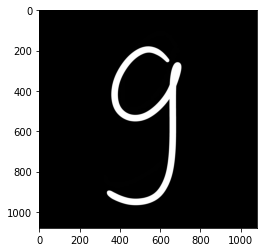

In [256]:
img1 = cv2.imread("dataset/9/img (22).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


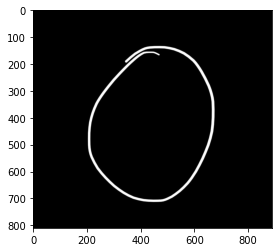

In [257]:
img1 = cv2.imread("dataset/0/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


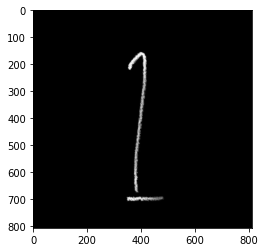

In [258]:
img1 = cv2.imread("dataset/1/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


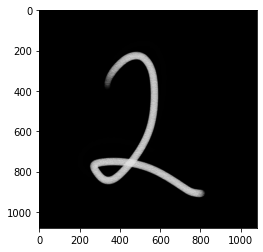

In [259]:
img1 = cv2.imread("dataset/2/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


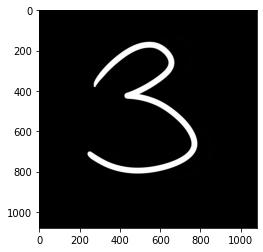

In [260]:
img1 = cv2.imread("dataset/3/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


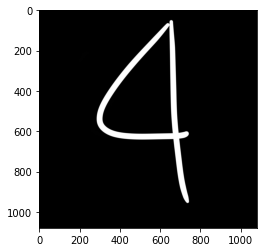

In [261]:
img1 = cv2.imread("dataset/4/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


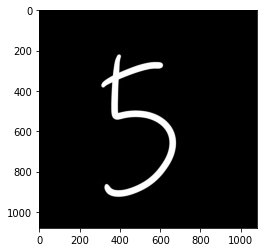

In [263]:
img1 = cv2.imread("dataset/5/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


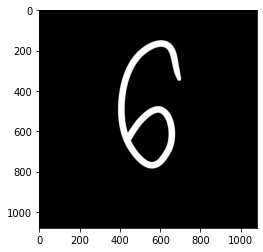

In [264]:
img1 = cv2.imread("dataset/6/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


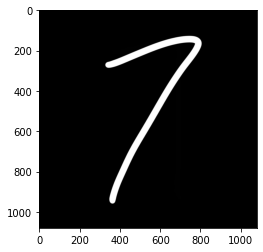

In [265]:
img1 = cv2.imread("dataset/7/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


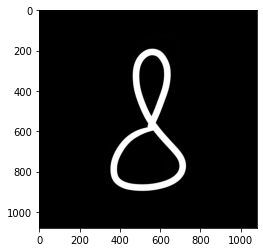

In [266]:
img1 = cv2.imread("dataset/8/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


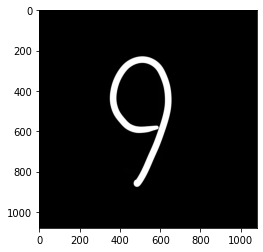

In [267]:
img1 = cv2.imread("dataset/9/img (23).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


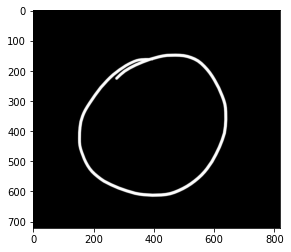

In [268]:
img1 = cv2.imread("dataset/0/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


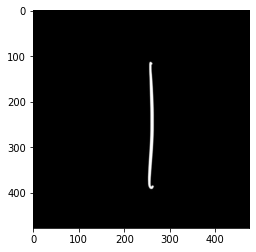

In [269]:
img1 = cv2.imread("dataset/1/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


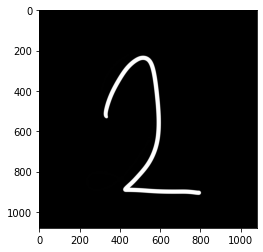

In [270]:
img1 = cv2.imread("dataset/2/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


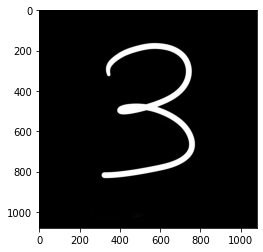

In [271]:
img1 = cv2.imread("dataset/3/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


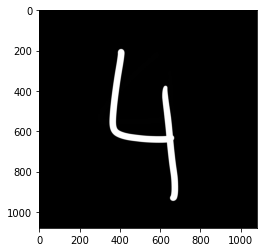

In [272]:
img1 = cv2.imread("dataset/4/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


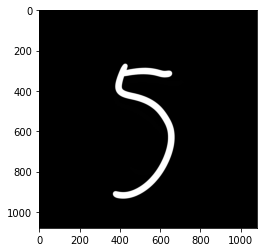

In [273]:
img1 = cv2.imread("dataset/5/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


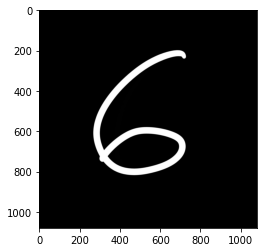

In [274]:
img1 = cv2.imread("dataset/6/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


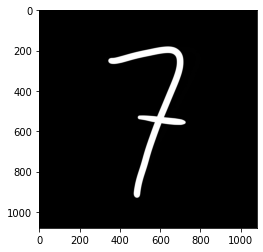

In [275]:
img1 = cv2.imread("dataset/7/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


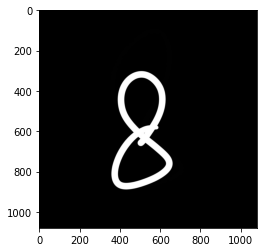

In [276]:
img1 = cv2.imread("dataset/8/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


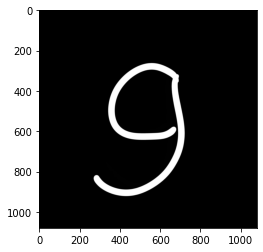

In [277]:
img1 = cv2.imread("dataset/9/img (24).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


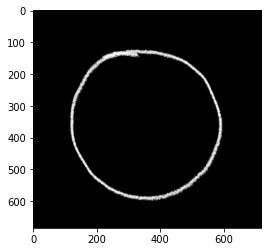

In [278]:
img1 = cv2.imread("dataset/0/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


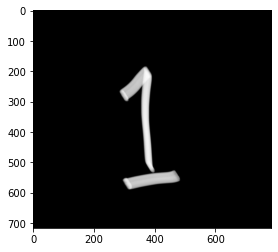

In [279]:
img1 = cv2.imread("dataset/1/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


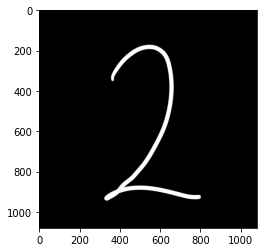

In [280]:
img1 = cv2.imread("dataset/2/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


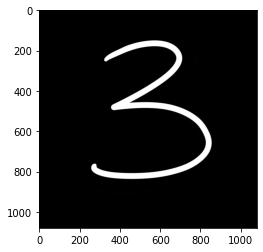

In [282]:
img1 = cv2.imread("dataset/3/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


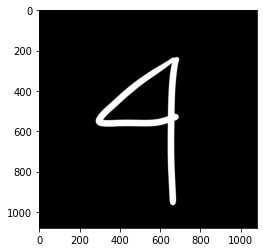

In [283]:
img1 = cv2.imread("dataset/4/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


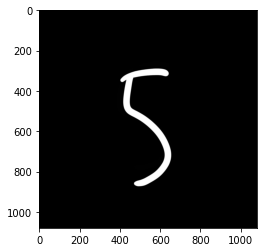

In [284]:
img1 = cv2.imread("dataset/5/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


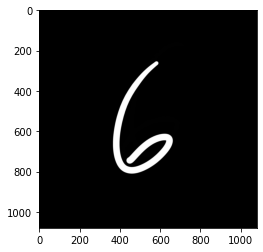

In [285]:
img1 = cv2.imread("dataset/6/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


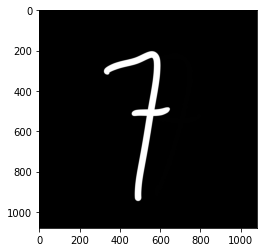

In [286]:
img1 = cv2.imread("dataset/7/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


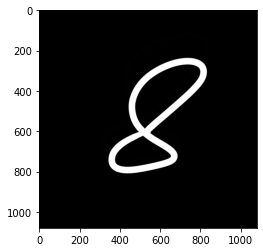

In [287]:
img1 = cv2.imread("dataset/8/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


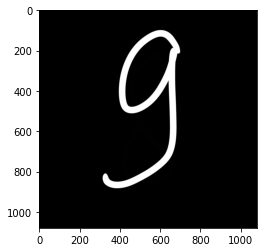

In [288]:
img1 = cv2.imread("dataset/9/img (25).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


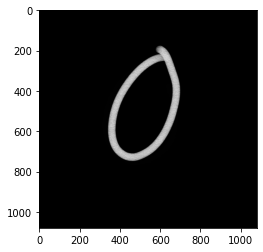

In [289]:
img1 = cv2.imread("dataset/0/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


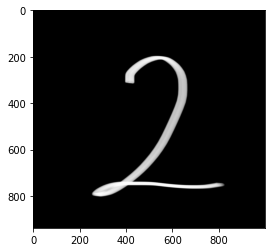

In [290]:
img1 = cv2.imread("dataset/2/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


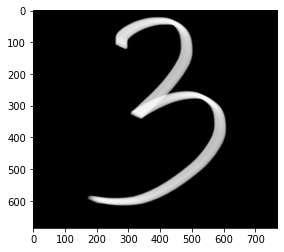

In [291]:
img1 = cv2.imread("dataset/3/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


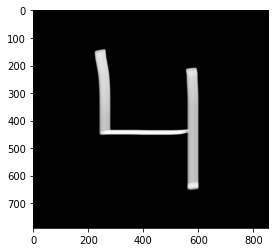

In [292]:
img1 = cv2.imread("dataset/4/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


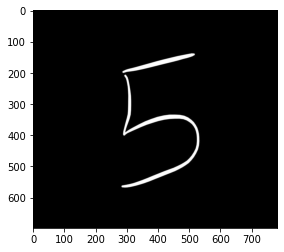

In [293]:
img1 = cv2.imread("dataset/5/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


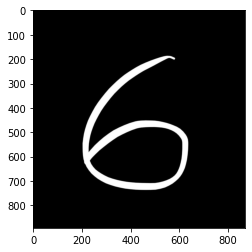

In [294]:
img1 = cv2.imread("dataset/6/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


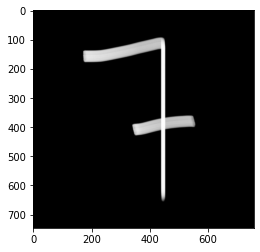

In [296]:
img1 = cv2.imread("dataset/7/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


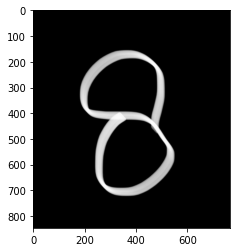

In [297]:
img1 = cv2.imread("dataset/8/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


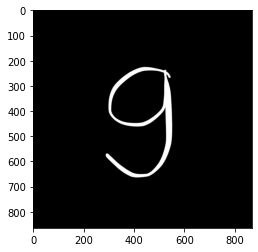

In [298]:
img1 = cv2.imread("dataset/9/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


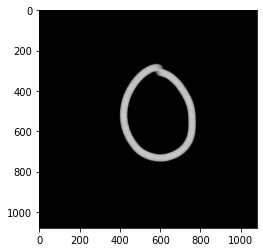

In [299]:
img1 = cv2.imread("dataset/0/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


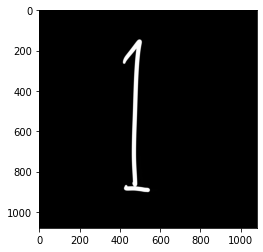

In [300]:
img1 = cv2.imread("dataset/1/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


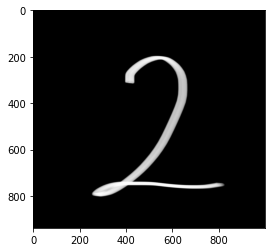

In [301]:
img1 = cv2.imread("dataset/2/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


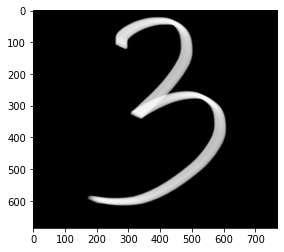

In [302]:
img1 = cv2.imread("dataset/3/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


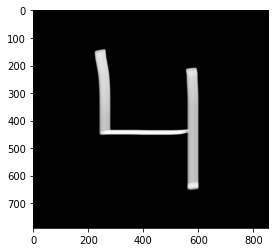

In [303]:
img1 = cv2.imread("dataset/4/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


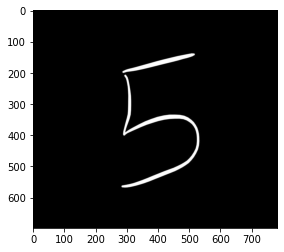

In [304]:
img1 = cv2.imread("dataset/5/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


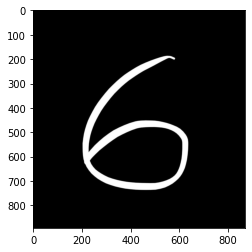

In [305]:
img1 = cv2.imread("dataset/6/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


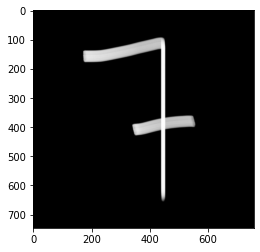

In [306]:
img1 = cv2.imread("dataset/7/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


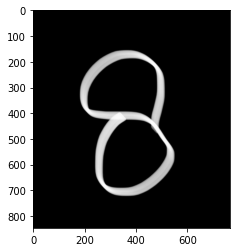

In [307]:
img1 = cv2.imread("dataset/8/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


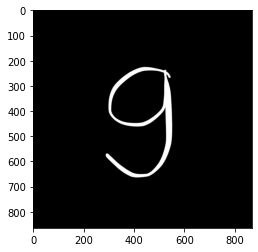

In [308]:
img1 = cv2.imread("dataset/9/img (26).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


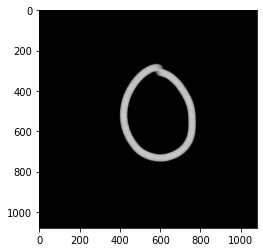

In [309]:
img1 = cv2.imread("dataset/0/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


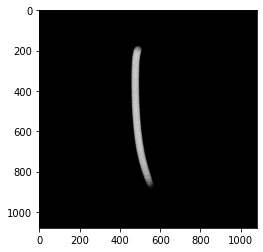

In [310]:
img1 = cv2.imread("dataset/1/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


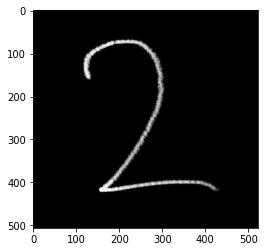

In [311]:
img1 = cv2.imread("dataset/2/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


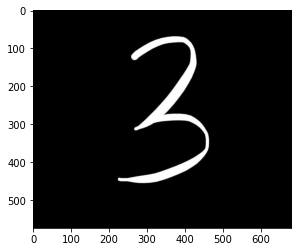

In [312]:
img1 = cv2.imread("dataset/3/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


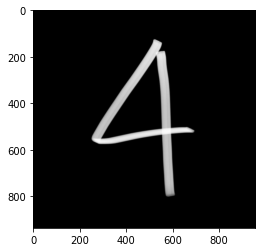

In [313]:
img1 = cv2.imread("dataset/4/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


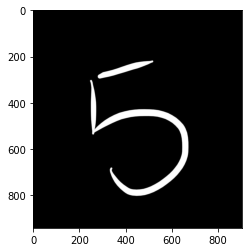

In [314]:
img1 = cv2.imread("dataset/5/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


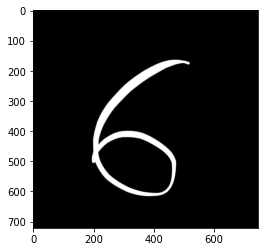

In [315]:
img1 = cv2.imread("dataset/6/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


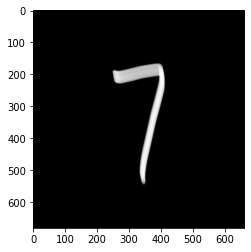

In [316]:
img1 = cv2.imread("dataset/7/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


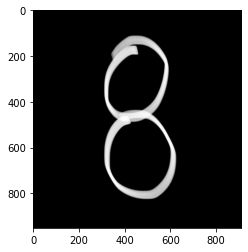

In [317]:
img1 = cv2.imread("dataset/8/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


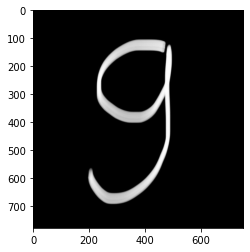

In [318]:
img1 = cv2.imread("dataset/9/img (27).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


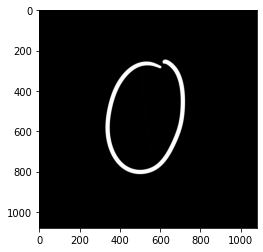

In [319]:
img1 = cv2.imread("dataset/0/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


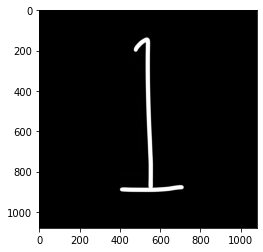

In [320]:
img1 = cv2.imread("dataset/1/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


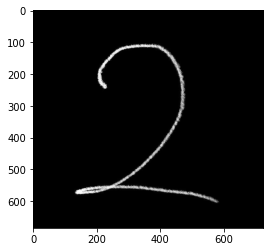

In [321]:
img1 = cv2.imread("dataset/2/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


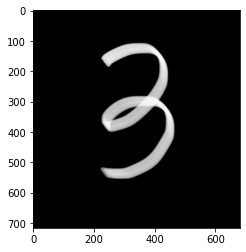

In [322]:
img1 = cv2.imread("dataset/3/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


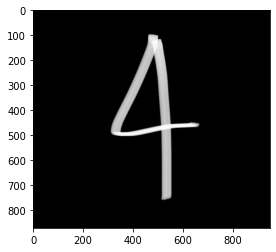

In [323]:
img1 = cv2.imread("dataset/4/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


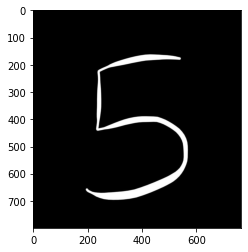

In [324]:
img1 = cv2.imread("dataset/5/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


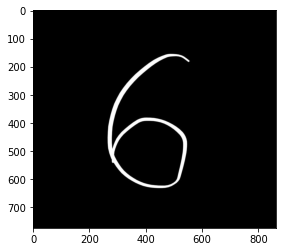

In [325]:
img1 = cv2.imread("dataset/6/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


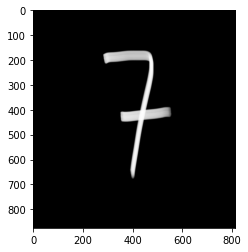

In [326]:
img1 = cv2.imread("dataset/7/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


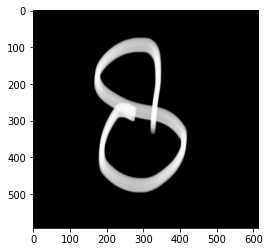

In [327]:
img1 = cv2.imread("dataset/8/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


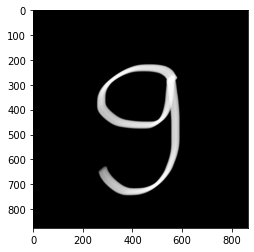

In [328]:
img1 = cv2.imread("dataset/9/img (28).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


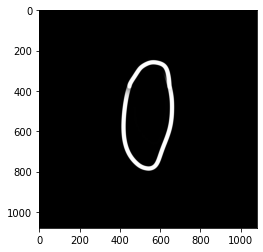

In [329]:
img1 = cv2.imread("dataset/0/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


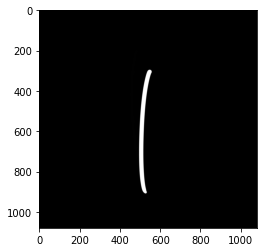

In [330]:
img1 = cv2.imread("dataset/1/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


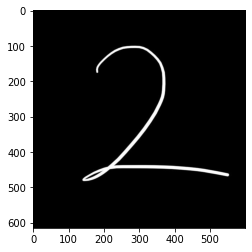

In [331]:
img1 = cv2.imread("dataset/2/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


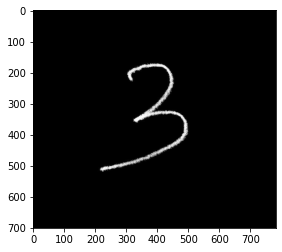

In [332]:
img1 = cv2.imread("dataset/3/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


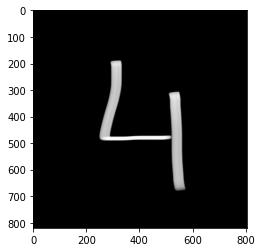

In [333]:
img1 = cv2.imread("dataset/4/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


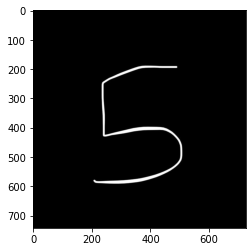

In [334]:
img1 = cv2.imread("dataset/5/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


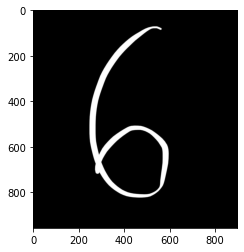

In [335]:
img1 = cv2.imread("dataset/6/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


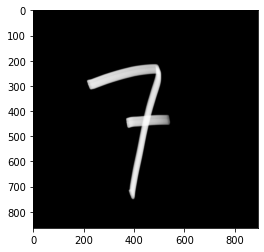

In [336]:
img1 = cv2.imread("dataset/7/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


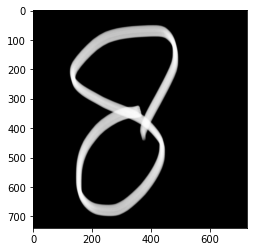

In [337]:
img1 = cv2.imread("dataset/8/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


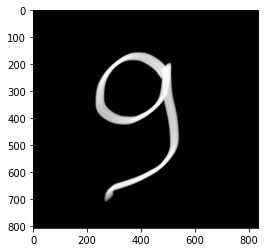

In [338]:
img1 = cv2.imread("dataset/9/img (29).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


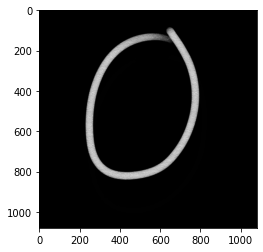

In [339]:
img1 = cv2.imread("dataset/0/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


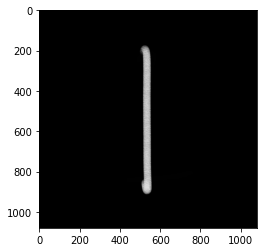

In [340]:
img1 = cv2.imread("dataset/1/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


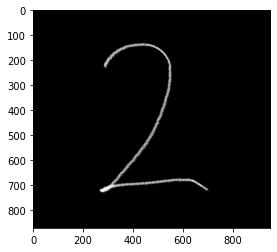

In [341]:
img1 = cv2.imread("dataset/2/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


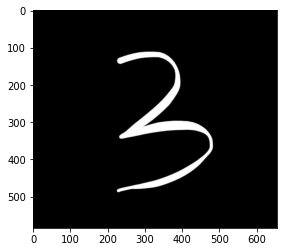

In [342]:
img1 = cv2.imread("dataset/3/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


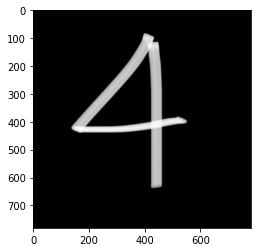

In [343]:
img1 = cv2.imread("dataset/4/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


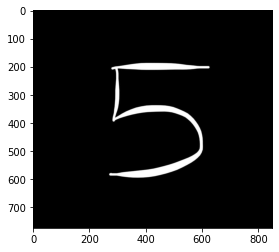

In [344]:
img1 = cv2.imread("dataset/5/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


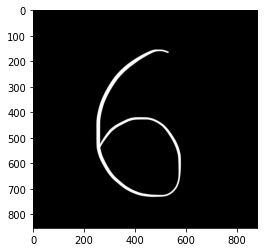

In [345]:
img1 = cv2.imread("dataset/6/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


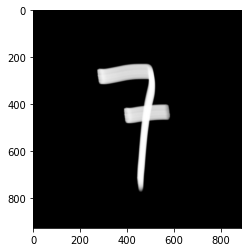

In [346]:
img1 = cv2.imread("dataset/7/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


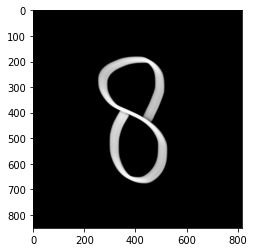

In [347]:
img1 = cv2.imread("dataset/8/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


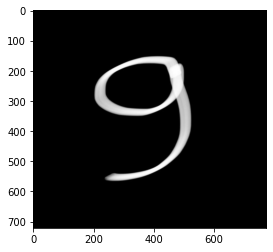

In [348]:
img1 = cv2.imread("dataset/9/img (30).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


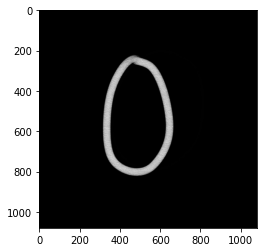

In [349]:
img1 = cv2.imread("dataset/0/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


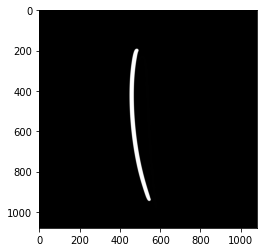

In [350]:
img1 = cv2.imread("dataset/1/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


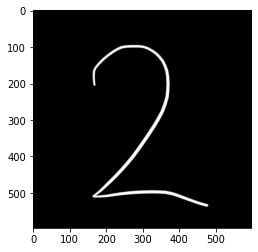

In [351]:
img1 = cv2.imread("dataset/2/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


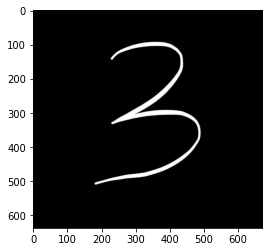

In [352]:
img1 = cv2.imread("dataset/3/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


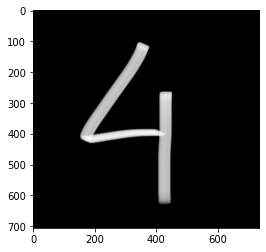

In [353]:
img1 = cv2.imread("dataset/4/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


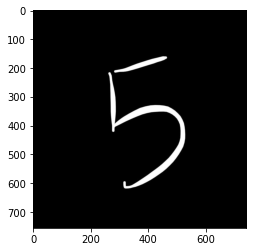

In [355]:
img1 = cv2.imread("dataset/5/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


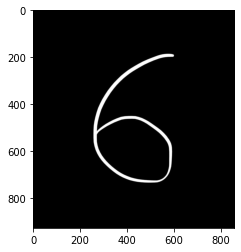

In [356]:
img1 = cv2.imread("dataset/6/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


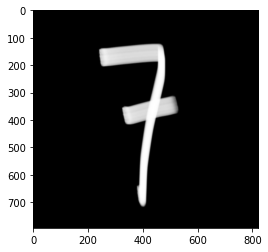

In [357]:
img1 = cv2.imread("dataset/7/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


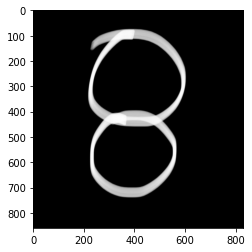

In [358]:
img1 = cv2.imread("dataset/8/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


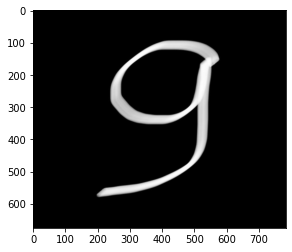

In [359]:
img1 = cv2.imread("dataset/9/img (31).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


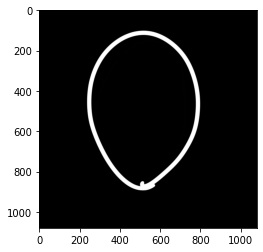

In [360]:
img1 = cv2.imread("dataset/0/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


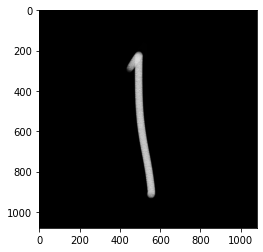

In [361]:
img1 = cv2.imread("dataset/1/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


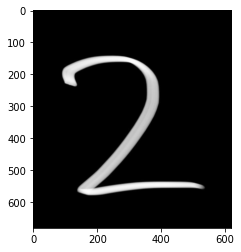

In [362]:
img1 = cv2.imread("dataset/2/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


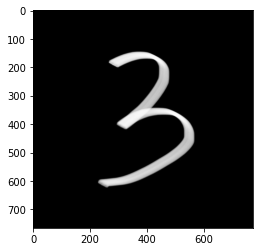

In [363]:
img1 = cv2.imread("dataset/3/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


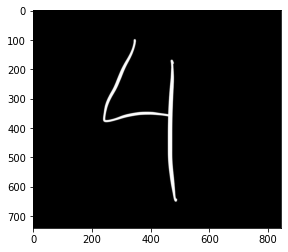

In [364]:
img1 = cv2.imread("dataset/4/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


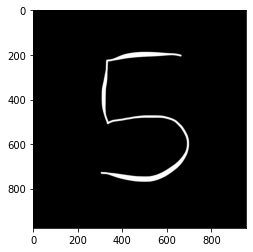

In [365]:
img1 = cv2.imread("dataset/5/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


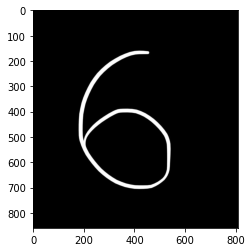

In [366]:
img1 = cv2.imread("dataset/6/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


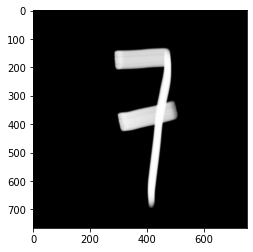

In [367]:
img1 = cv2.imread("dataset/7/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


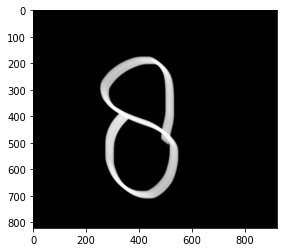

In [368]:
img1 = cv2.imread("dataset/8/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


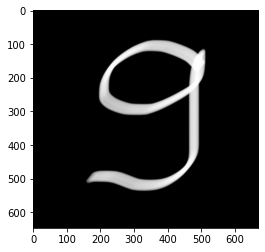

In [369]:
img1 = cv2.imread("dataset/9/img (32).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


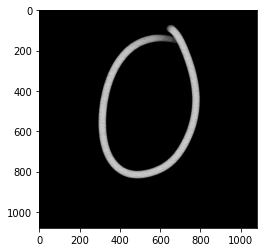

In [370]:
img1 = cv2.imread("dataset/0/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


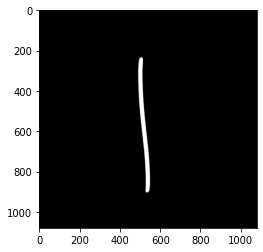

In [371]:
img1 = cv2.imread("dataset/1/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


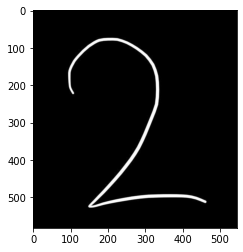

In [372]:
img1 = cv2.imread("dataset/2/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


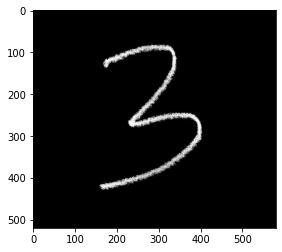

In [373]:
img1 = cv2.imread("dataset/3/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


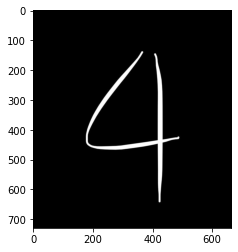

In [374]:
img1 = cv2.imread("dataset/4/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


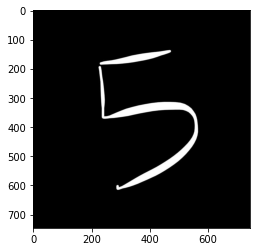

In [375]:
img1 = cv2.imread("dataset/5/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


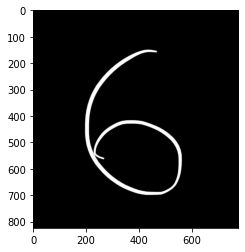

In [376]:
img1 = cv2.imread("dataset/6/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


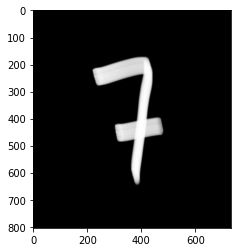

In [377]:
img1 = cv2.imread("dataset/7/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


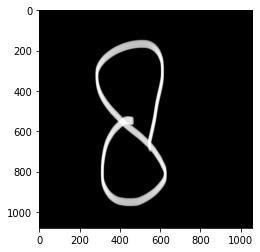

In [378]:
img1 = cv2.imread("dataset/8/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


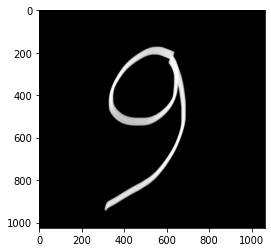

In [379]:
img1 = cv2.imread("dataset/9/img (33).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


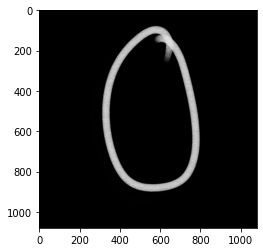

In [380]:
img1 = cv2.imread("dataset/0/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


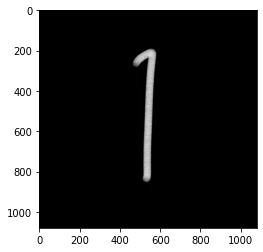

In [381]:
img1 = cv2.imread("dataset/1/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


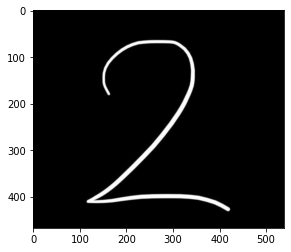

In [382]:
img1 = cv2.imread("dataset/2/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


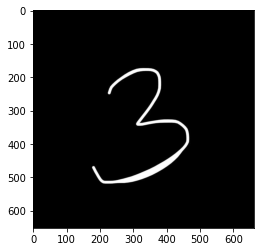

In [383]:
img1 = cv2.imread("dataset/3/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


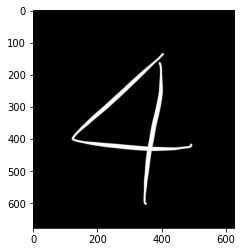

In [384]:
img1 = cv2.imread("dataset/4/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


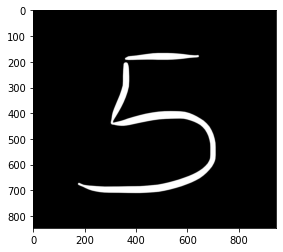

In [385]:
img1 = cv2.imread("dataset/5/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


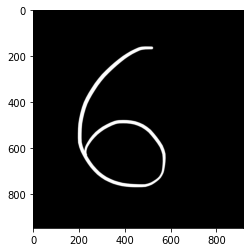

In [386]:
img1 = cv2.imread("dataset/6/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


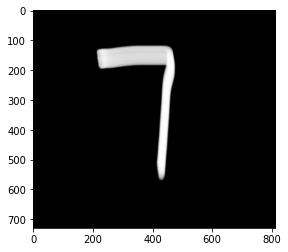

In [387]:
img1 = cv2.imread("dataset/7/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


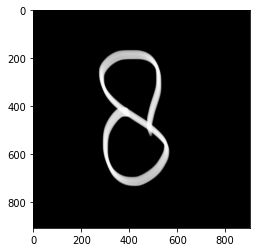

In [388]:
img1 = cv2.imread("dataset/8/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


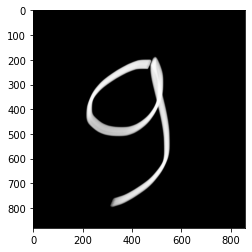

In [389]:
img1 = cv2.imread("dataset/9/img (34).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


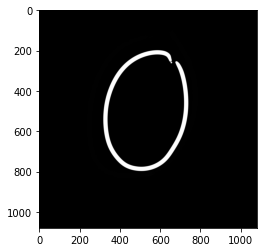

In [390]:
img1 = cv2.imread("dataset/0/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


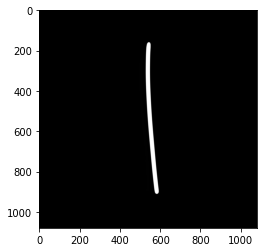

In [391]:
img1 = cv2.imread("dataset/1/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


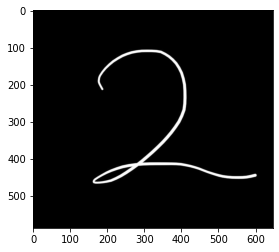

In [392]:
img1 = cv2.imread("dataset/2/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


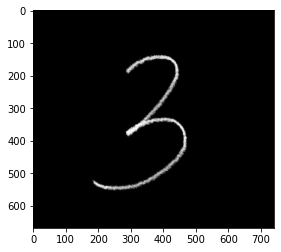

In [393]:
img1 = cv2.imread("dataset/3/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


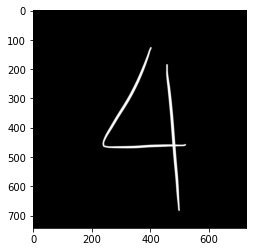

In [394]:
img1 = cv2.imread("dataset/4/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


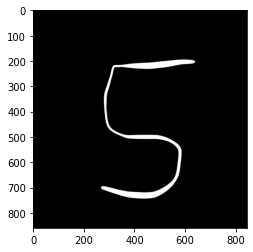

In [395]:
img1 = cv2.imread("dataset/5/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


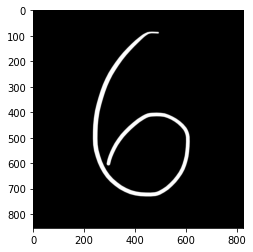

In [396]:
img1 = cv2.imread("dataset/6/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


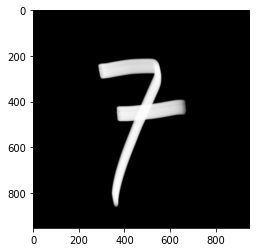

In [397]:
img1 = cv2.imread("dataset/7/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


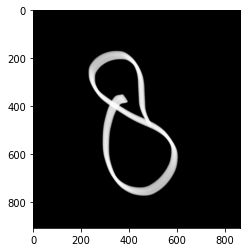

In [398]:
img1 = cv2.imread("dataset/8/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


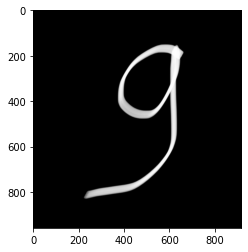

In [399]:
img1 = cv2.imread("dataset/9/img (35).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


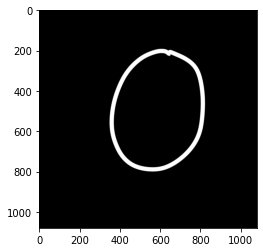

In [400]:
img1 = cv2.imread("dataset/0/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


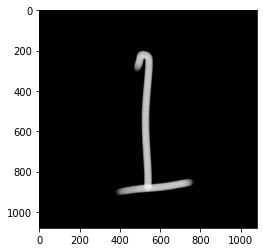

In [401]:
img1 = cv2.imread("dataset/1/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


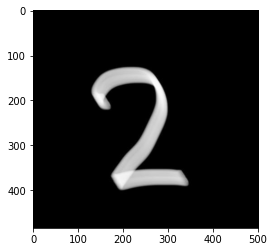

In [402]:
img1 = cv2.imread("dataset/2/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


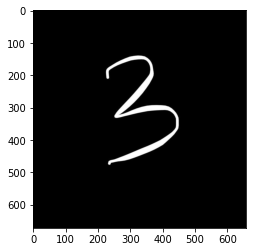

In [403]:
img1 = cv2.imread("dataset/3/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


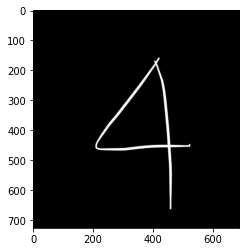

In [404]:
img1 = cv2.imread("dataset/4/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


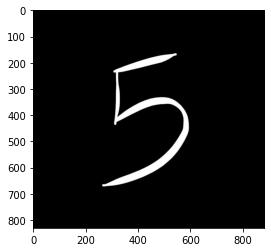

In [405]:
img1 = cv2.imread("dataset/5/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


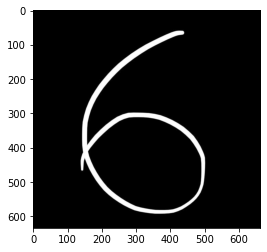

In [406]:
img1 = cv2.imread("dataset/6/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


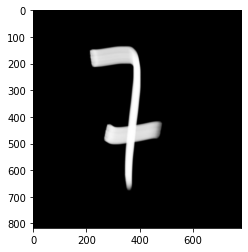

In [407]:
img1 = cv2.imread("dataset/7/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


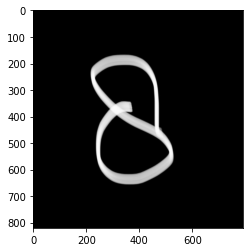

In [408]:
img1 = cv2.imread("dataset/8/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


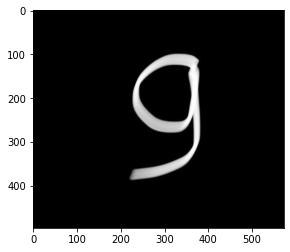

In [409]:
img1 = cv2.imread("dataset/9/img (36).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


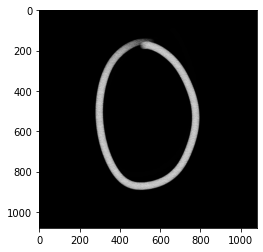

In [410]:
img1 = cv2.imread("dataset/0/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


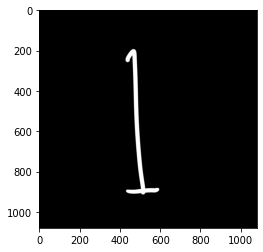

In [411]:
img1 = cv2.imread("dataset/1/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


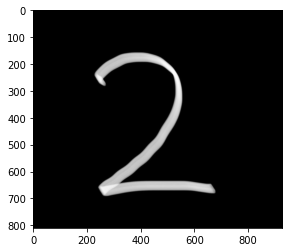

In [412]:
img1 = cv2.imread("dataset/2/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


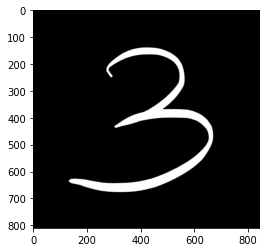

In [413]:
img1 = cv2.imread("dataset/3/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


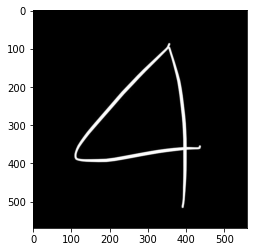

In [414]:
img1 = cv2.imread("dataset/4/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


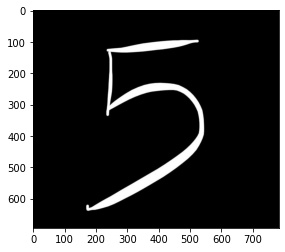

In [415]:
img1 = cv2.imread("dataset/5/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


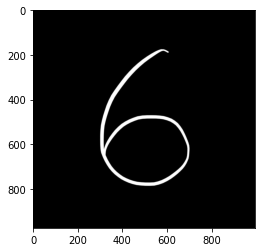

In [416]:
img1 = cv2.imread("dataset/6/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


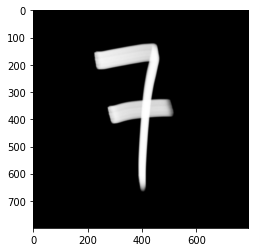

In [417]:
img1 = cv2.imread("dataset/7/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


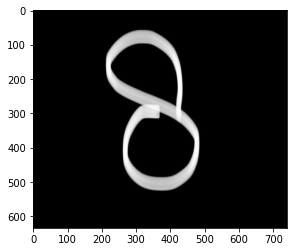

In [418]:
img1 = cv2.imread("dataset/8/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


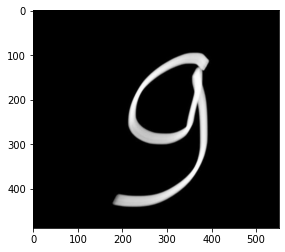

In [419]:
img1 = cv2.imread("dataset/9/img (37).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


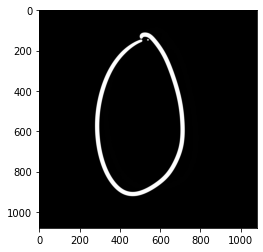

In [420]:
img1 = cv2.imread("dataset/0/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


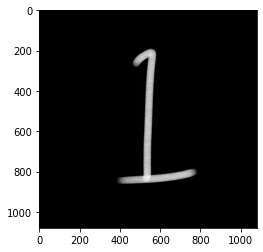

In [421]:
img1 = cv2.imread("dataset/1/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


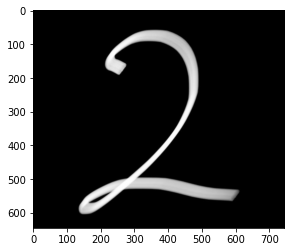

In [422]:
img1 = cv2.imread("dataset/2/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


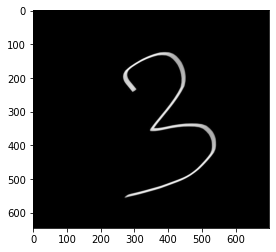

In [423]:
img1 = cv2.imread("dataset/3/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


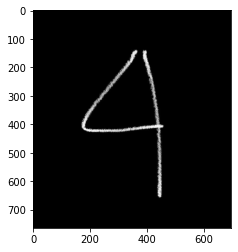

In [424]:
img1 = cv2.imread("dataset/4/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


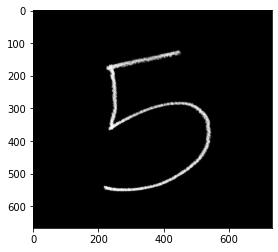

In [425]:
img1 = cv2.imread("dataset/5/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


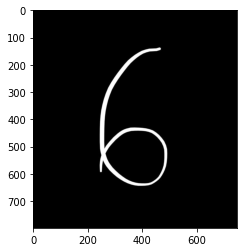

In [426]:
img1 = cv2.imread("dataset/6/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


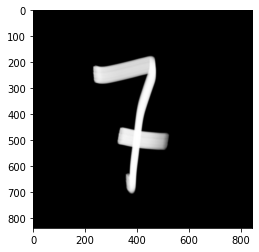

In [427]:
img1 = cv2.imread("dataset/7/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


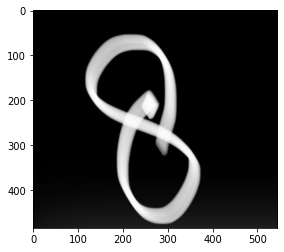

In [428]:
img1 = cv2.imread("dataset/8/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


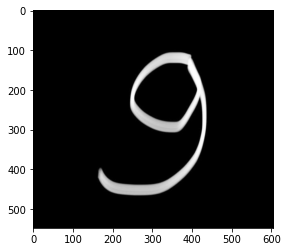

In [429]:
img1 = cv2.imread("dataset/9/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


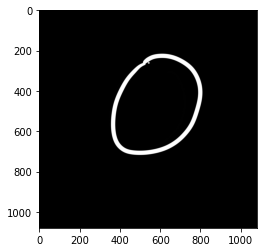

In [430]:
img1 = cv2.imread("dataset/0/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


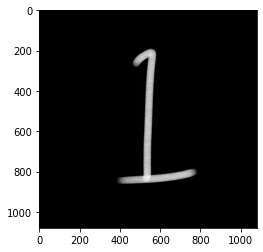

In [431]:
img1 = cv2.imread("dataset/1/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


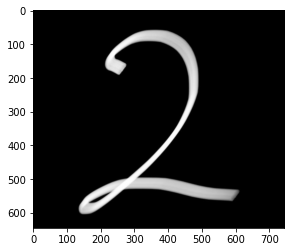

In [432]:
img1 = cv2.imread("dataset/2/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


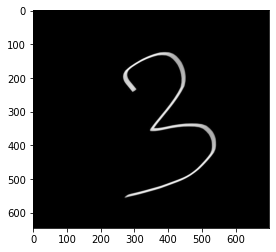

In [433]:
img1 = cv2.imread("dataset/3/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


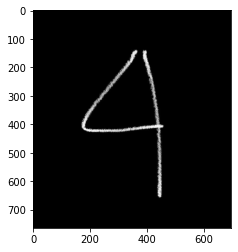

In [434]:
img1 = cv2.imread("dataset/4/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


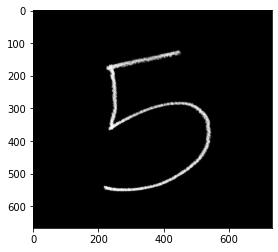

In [435]:
img1 = cv2.imread("dataset/5/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


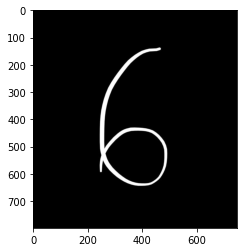

In [436]:
img1 = cv2.imread("dataset/6/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


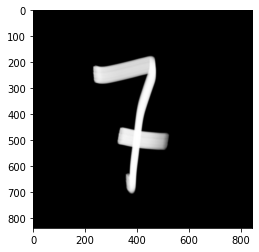

In [437]:
img1 = cv2.imread("dataset/7/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


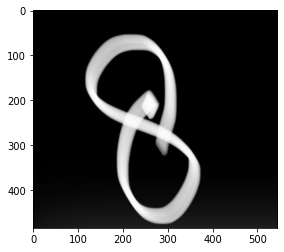

In [438]:
img1 = cv2.imread("dataset/8/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


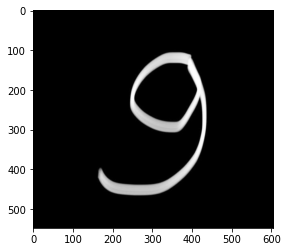

In [439]:
img1 = cv2.imread("dataset/9/img (38).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


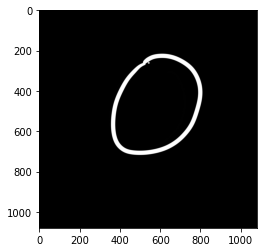

In [440]:
img1 = cv2.imread("dataset/0/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


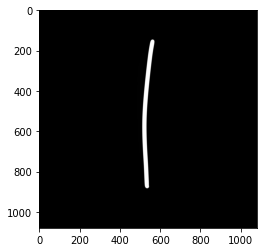

In [441]:
img1 = cv2.imread("dataset/1/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


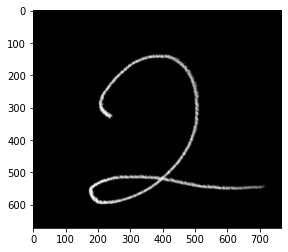

In [442]:
img1 = cv2.imread("dataset/2/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


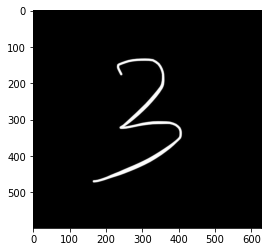

In [443]:
img1 = cv2.imread("dataset/3/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


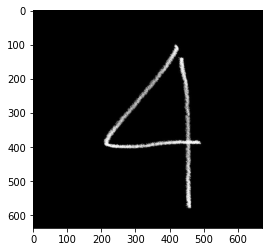

In [444]:
img1 = cv2.imread("dataset/4/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


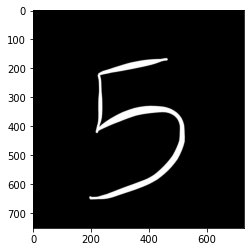

In [445]:
img1 = cv2.imread("dataset/5/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


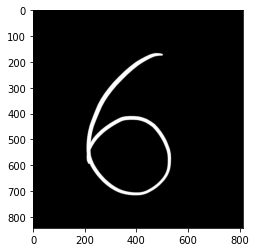

In [446]:
img1 = cv2.imread("dataset/6/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


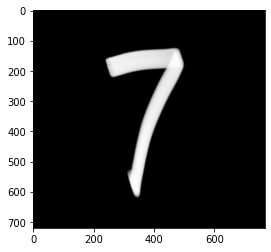

In [447]:
img1 = cv2.imread("dataset/7/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


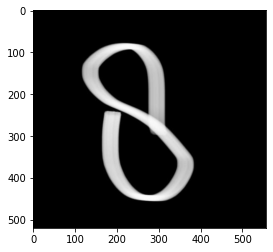

In [448]:
img1 = cv2.imread("dataset/8/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


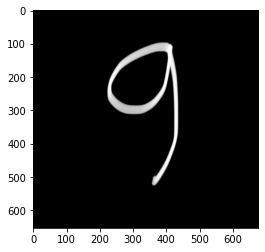

In [449]:
img1 = cv2.imread("dataset/9/img (39).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


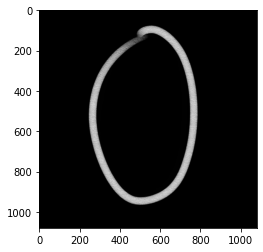

In [450]:
img1 = cv2.imread("dataset/0/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


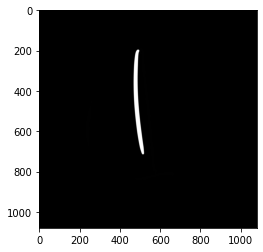

In [451]:
img1 = cv2.imread("dataset/1/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


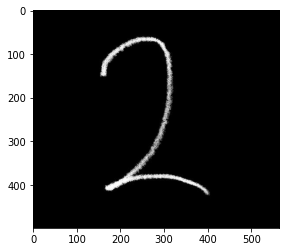

In [452]:
img1 = cv2.imread("dataset/2/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


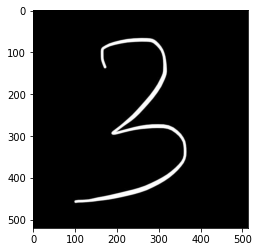

In [453]:
img1 = cv2.imread("dataset/3/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


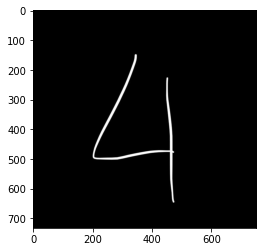

In [454]:
img1 = cv2.imread("dataset/4/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


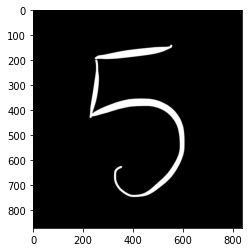

In [455]:
img1 = cv2.imread("dataset/5/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


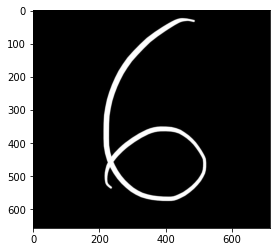

In [456]:
img1 = cv2.imread("dataset/6/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


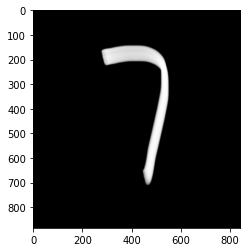

In [457]:
img1 = cv2.imread("dataset/7/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


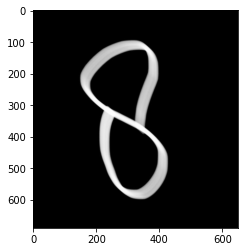

In [458]:
img1 = cv2.imread("dataset/8/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


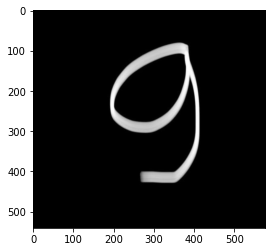

In [459]:
img1 = cv2.imread("dataset/9/img (40).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


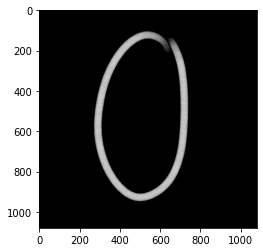

In [460]:
img1 = cv2.imread("dataset/0/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


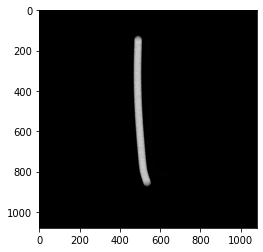

In [461]:
img1 = cv2.imread("dataset/1/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


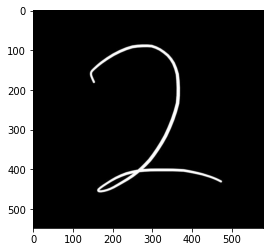

In [462]:
img1 = cv2.imread("dataset/2/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


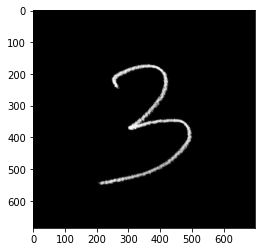

In [463]:
img1 = cv2.imread("dataset/3/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


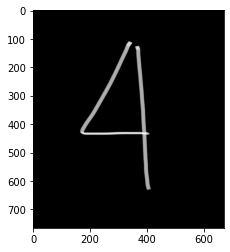

In [464]:
img1 = cv2.imread("dataset/4/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


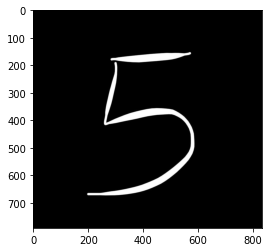

In [465]:
img1 = cv2.imread("dataset/5/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


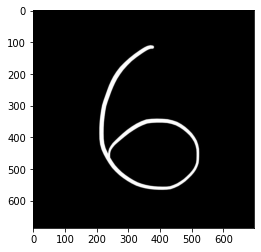

In [466]:
img1 = cv2.imread("dataset/6/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


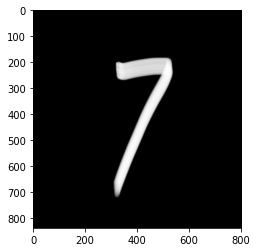

In [467]:
img1 = cv2.imread("dataset/7/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


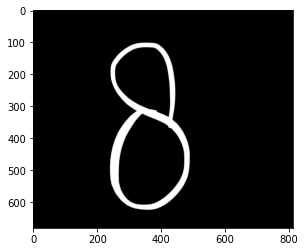

In [468]:
img1 = cv2.imread("dataset/8/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


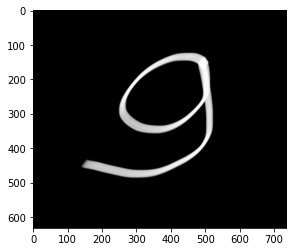

In [469]:
img1 = cv2.imread("dataset/9/img (41).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


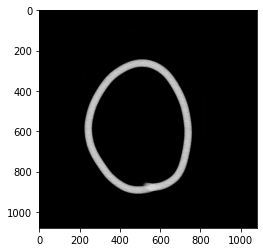

In [470]:
img1 = cv2.imread("dataset/0/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


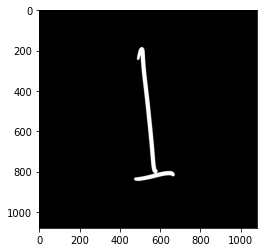

In [472]:
img1 = cv2.imread("dataset/1/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


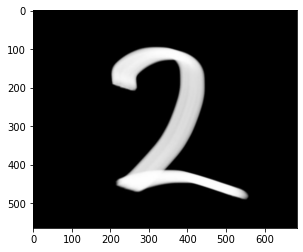

In [473]:
img1 = cv2.imread("dataset/2/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


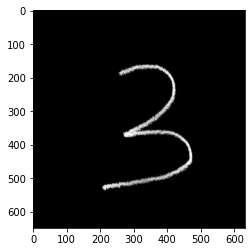

In [474]:
img1 = cv2.imread("dataset/3/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


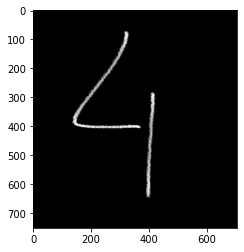

In [475]:
img1 = cv2.imread("dataset/4/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


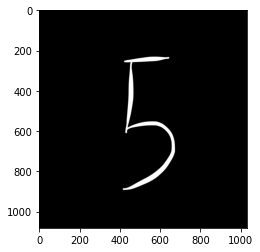

In [476]:
img1 = cv2.imread("dataset/5/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


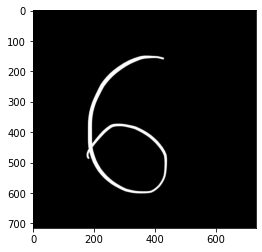

In [477]:
img1 = cv2.imread("dataset/6/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


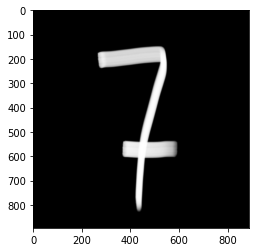

In [478]:
img1 = cv2.imread("dataset/7/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


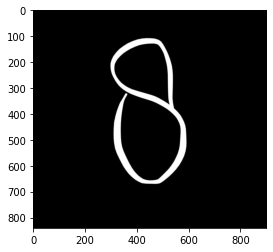

In [479]:
img1 = cv2.imread("dataset/8/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


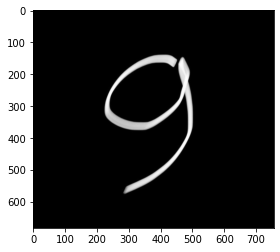

In [480]:
img1 = cv2.imread("dataset/9/img (42).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


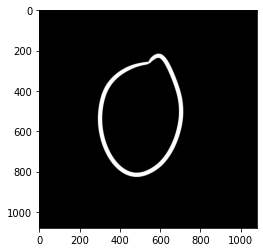

In [481]:
img1 = cv2.imread("dataset/0/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


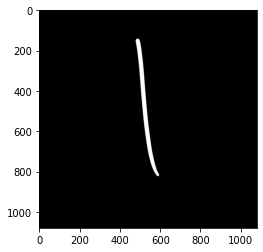

In [482]:
img1 = cv2.imread("dataset/1/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


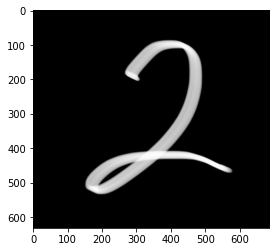

In [483]:
img1 = cv2.imread("dataset/2/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


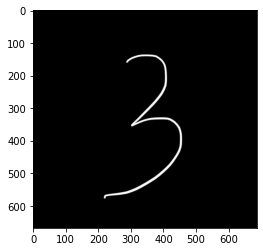

In [484]:
img1 = cv2.imread("dataset/3/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


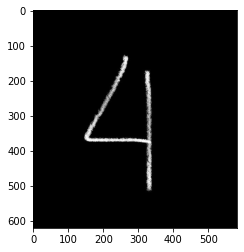

In [485]:
img1 = cv2.imread("dataset/4/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


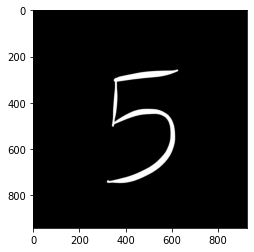

In [486]:
img1 = cv2.imread("dataset/5/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


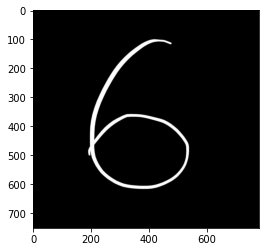

In [487]:
img1 = cv2.imread("dataset/6/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


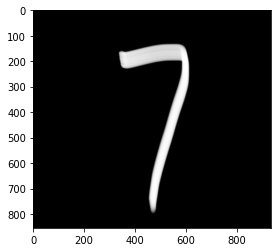

In [488]:
img1 = cv2.imread("dataset/7/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


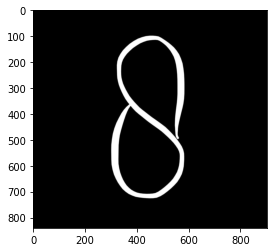

In [489]:
img1 = cv2.imread("dataset/8/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


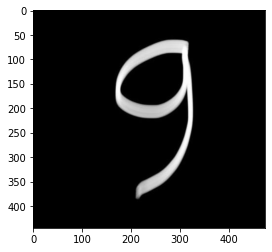

In [490]:
img1 = cv2.imread("dataset/9/img (43).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


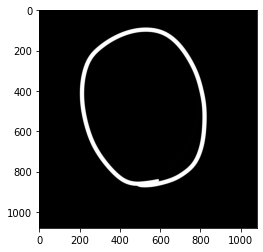

In [491]:
img1 = cv2.imread("dataset/0/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


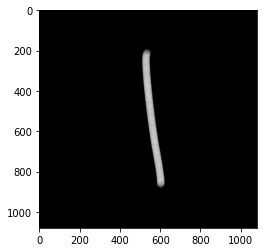

In [492]:
img1 = cv2.imread("dataset/1/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


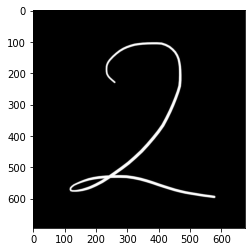

In [493]:
img1 = cv2.imread("dataset/2/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


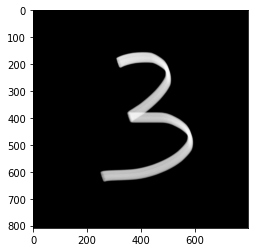

In [494]:
img1 = cv2.imread("dataset/3/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


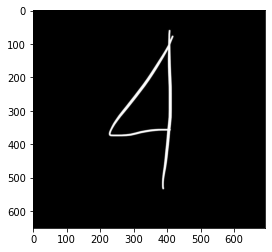

In [495]:
img1 = cv2.imread("dataset/4/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


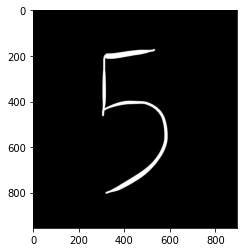

In [496]:
img1 = cv2.imread("dataset/5/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


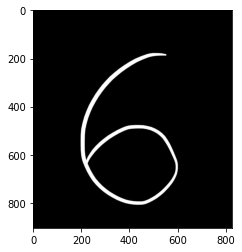

In [497]:
img1 = cv2.imread("dataset/6/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


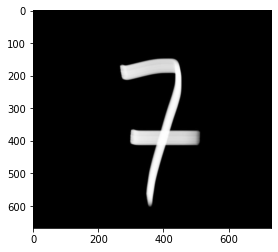

In [498]:
img1 = cv2.imread("dataset/7/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


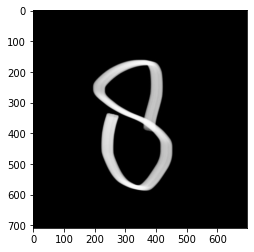

In [499]:
img1 = cv2.imread("dataset/8/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


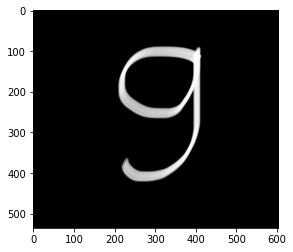

In [500]:
img1 = cv2.imread("dataset/9/img (44).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


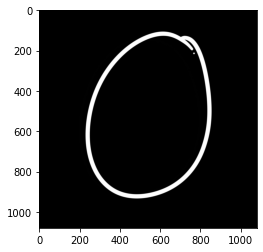

In [501]:
img1 = cv2.imread("dataset/0/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


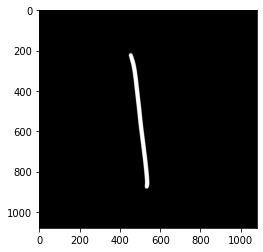

In [502]:
img1 = cv2.imread("dataset/1/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


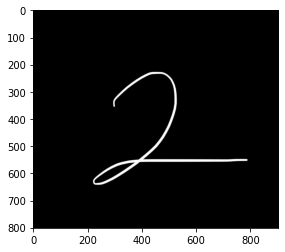

In [503]:
img1 = cv2.imread("dataset/2/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


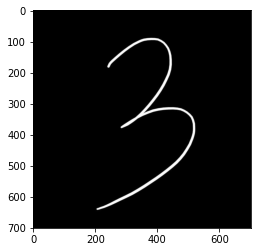

In [504]:
img1 = cv2.imread("dataset/3/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


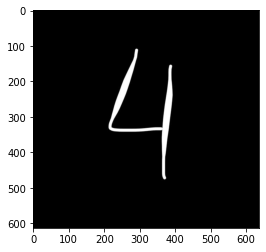

In [505]:
img1 = cv2.imread("dataset/4/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


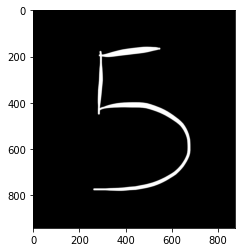

In [506]:
img1 = cv2.imread("dataset/5/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


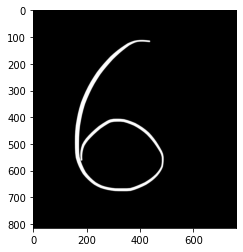

In [507]:
img1 = cv2.imread("dataset/6/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


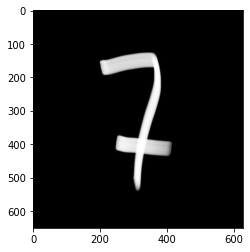

In [508]:
img1 = cv2.imread("dataset/7/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


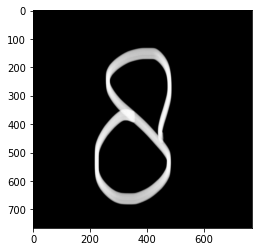

In [509]:
img1 = cv2.imread("dataset/8/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


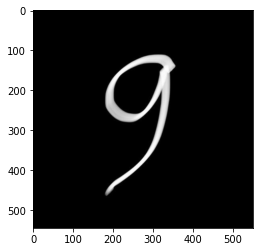

In [510]:
img1 = cv2.imread("dataset/9/img (45).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


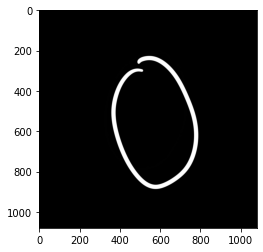

In [511]:
img1 = cv2.imread("dataset/0/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


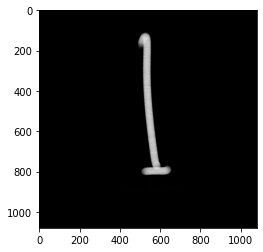

In [512]:
img1 = cv2.imread("dataset/1/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


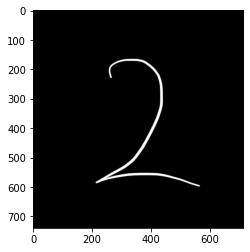

In [513]:
img1 = cv2.imread("dataset/2/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


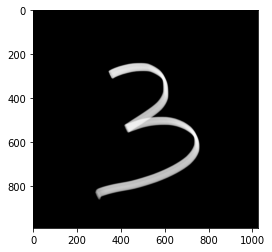

In [514]:
img1 = cv2.imread("dataset/3/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


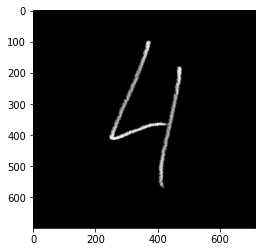

In [515]:
img1 = cv2.imread("dataset/4/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


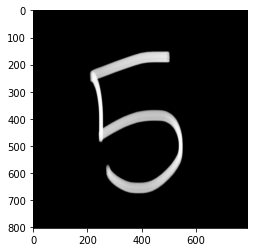

In [516]:
img1 = cv2.imread("dataset/5/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


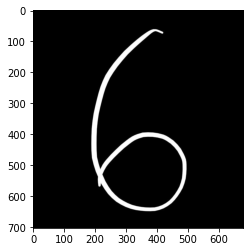

In [517]:
img1 = cv2.imread("dataset/6/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


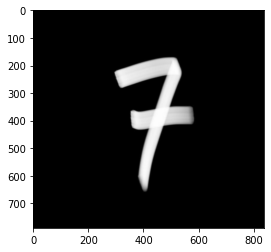

In [518]:
img1 = cv2.imread("dataset/7/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


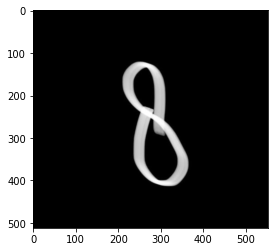

In [519]:
img1 = cv2.imread("dataset/8/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


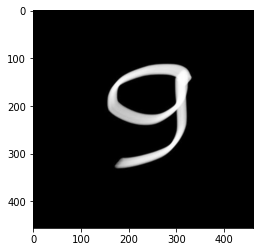

In [520]:
img1 = cv2.imread("dataset/9/img (46).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


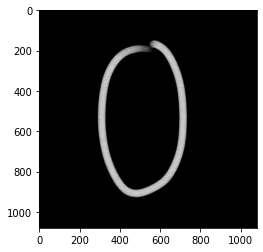

In [521]:
img1 = cv2.imread("dataset/0/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


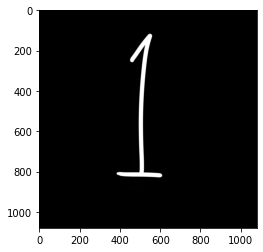

In [522]:
img1 = cv2.imread("dataset/1/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


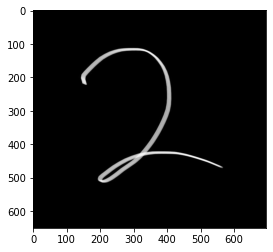

In [523]:
img1 = cv2.imread("dataset/2/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


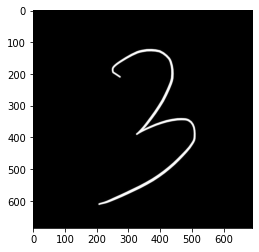

In [524]:
img1 = cv2.imread("dataset/3/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


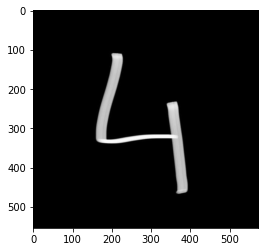

In [525]:
img1 = cv2.imread("dataset/4/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


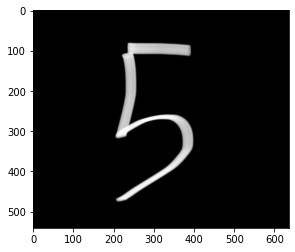

In [526]:
img1 = cv2.imread("dataset/5/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


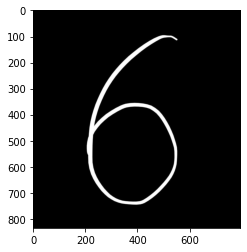

In [528]:
img1 = cv2.imread("dataset/6/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


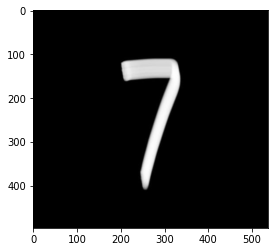

In [529]:
img1 = cv2.imread("dataset/7/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


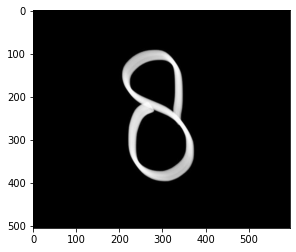

In [530]:
img1 = cv2.imread("dataset/8/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


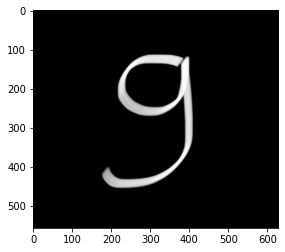

In [531]:
img1 = cv2.imread("dataset/9/img (47).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


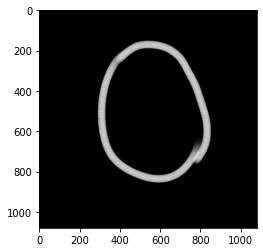

In [532]:
img1 = cv2.imread("dataset/0/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


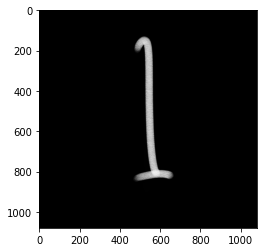

In [533]:
img1 = cv2.imread("dataset/1/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


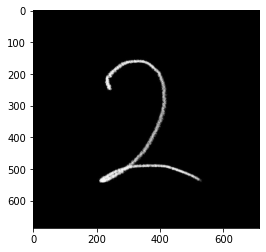

In [534]:
img1 = cv2.imread("dataset/2/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


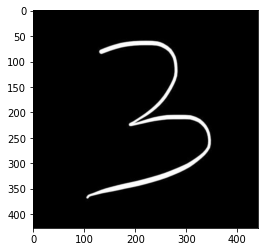

In [535]:
img1 = cv2.imread("dataset/3/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


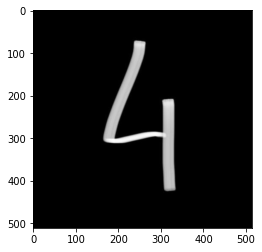

In [536]:
img1 = cv2.imread("dataset/4/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


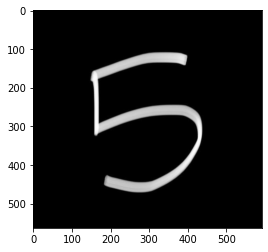

In [537]:
img1 = cv2.imread("dataset/5/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


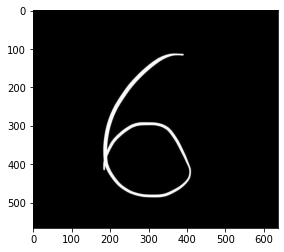

In [538]:
img1 = cv2.imread("dataset/6/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


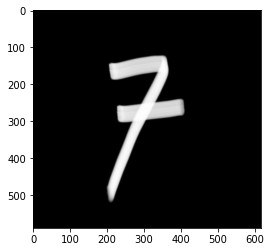

In [539]:
img1 = cv2.imread("dataset/7/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


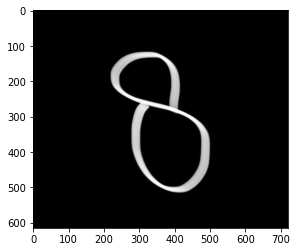

In [540]:
img1 = cv2.imread("dataset/8/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


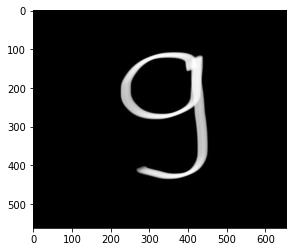

In [541]:
img1 = cv2.imread("dataset/9/img (48).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


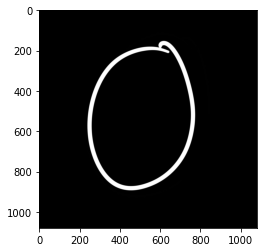

In [542]:
img1 = cv2.imread("dataset/0/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


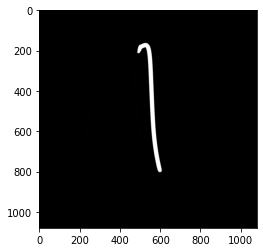

In [543]:
img1 = cv2.imread("dataset/1/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


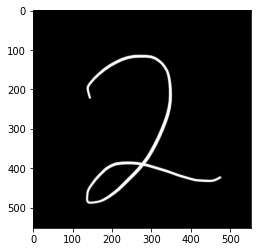

In [544]:
img1 = cv2.imread("dataset/2/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


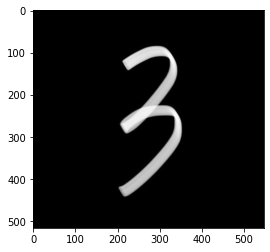

In [545]:
img1 = cv2.imread("dataset/3/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


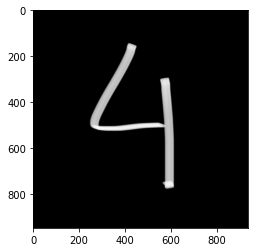

In [546]:
img1 = cv2.imread("dataset/4/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


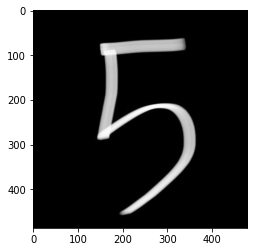

In [547]:
img1 = cv2.imread("dataset/5/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


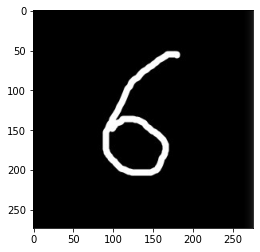

In [548]:
img1 = cv2.imread("dataset/6/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


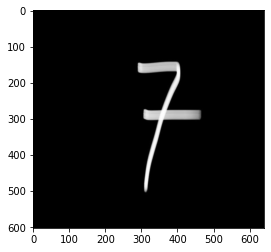

In [549]:
img1 = cv2.imread("dataset/7/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

8


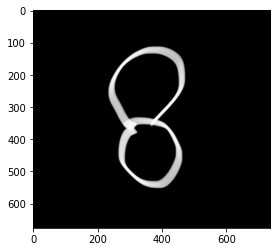

In [550]:
img1 = cv2.imread("dataset/8/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


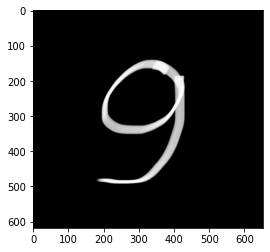

In [551]:
img1 = cv2.imread("dataset/9/img (49).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

0


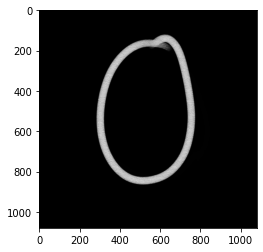

In [552]:
img1 = cv2.imread("dataset/0/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

1


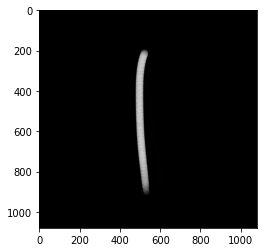

In [553]:
img1 = cv2.imread("dataset/1/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

2


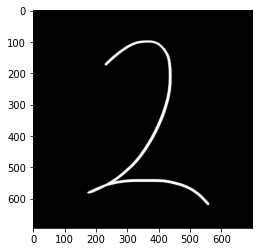

In [554]:
img1 = cv2.imread("dataset/2/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

3


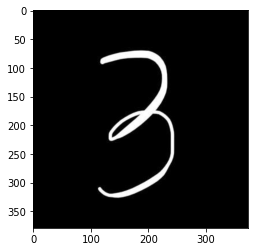

In [555]:
img1 = cv2.imread("dataset/3/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


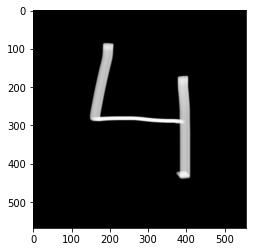

In [556]:
img1 = cv2.imread("dataset/4/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

5


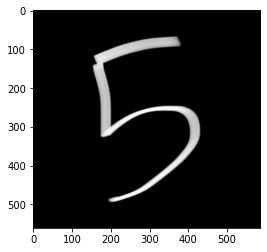

In [557]:
img1 = cv2.imread("dataset/5/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

6


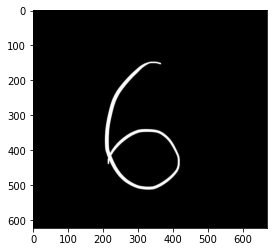

In [558]:
img1 = cv2.imread("dataset/6/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

7


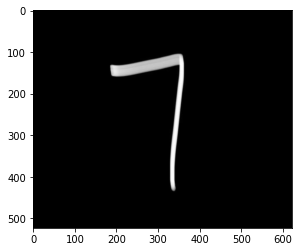

In [559]:
img1 = cv2.imread("dataset/7/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

4


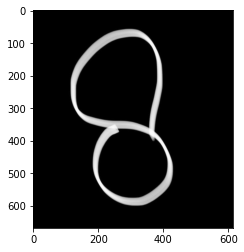

In [560]:
img1 = cv2.imread("dataset/8/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))

9


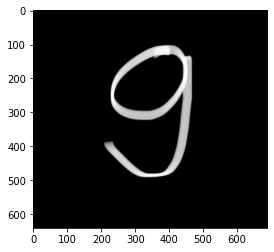

In [561]:
img1 = cv2.imread("dataset/9/img (50).jpg")
plt.imshow(img1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis=1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(newing)
print(np.argmax(predictions))